Importing the Data File and loading it into Pandas Data Frame

In [56]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sqlite3

# Path to your database file
db_path = r'C:\Users\Admin\OneDrive\Desktop\Cloudwalk Test Case\case database\case database.db'  # Change this to your actual file path

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Set busy timeout to handle locked database scenarios
conn.execute("PRAGMA busy_timeout = 30000")  # Set timeout to 30 seconds

# SQL Queries for each table
sql_queries = {
    'users': "SELECT * FROM users;",
    'emotional_data': "SELECT * FROM emotional_data;",
    'loans': "SELECT * FROM loans;"
}

# Loading each table into a pandas DataFrame
df_users = pd.read_sql(sql_queries['users'], conn)
df_emotional = pd.read_sql(sql_queries['emotional_data'], conn)
df_loans = pd.read_sql(sql_queries['loans'], conn)

# Close the connection when done
conn.close()

# Display the first few rows of each DataFrame to verify the data has been loaded correctly
print("Users DataFrame:")
print(df_users.head())

print("\nEmotional Data DataFrame:")
print(df_emotional.head())

print("\nLoans DataFrame:")
print(df_loans.head())


Users DataFrame:
   user_id     score approved_date denied_date  credit_limit  interest_rate  \
0        1  5.690000    2020-05-21  2024-05-24  32700.000000       0.050000   
1        2  5.668486    2020-01-27  2024-05-24  13645.727136       0.086237   
2        3  5.610000    2023-12-04  2025-04-26   9500.000000       0.090000   
3        4  5.640000    2020-05-14  2024-05-24   1800.000000       0.110000   
4        5  5.640000    2021-04-29  2024-05-24   1700.000000       0.110000   

   loan_term  
0  12.000000  
1  10.668666  
2   6.000000  
3   3.000000  
4   3.000000  

Emotional Data DataFrame:
   user_id            timestamp  intensity time_of_day primary_emotion  \
0        1  2019-04-07 22:50:39        4.0       night    anticipation   
1        1  2019-04-07 14:02:53        9.0   afternoon         boredom   
2        1  2019-04-07 03:16:21        7.0       night           shame   
3        1  2019-04-08 17:10:35        5.0     evening             joy   
4        1  2019-04-0

Data Exploration (Retrieving information about data)

In [58]:
# 1. Data Exploration
## Initial Data Exploration
print("Users DataFrame Info:")
print(df_users.info())
print(df_users.describe())
print("\nEmotional Data DataFrame Info:")
print(df_emotional.info())
print(df_emotional.describe())
print("\nLoans DataFrame Info:")
print(df_loans.info())
print(df_loans.describe())

Users DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        734 non-null    int64  
 1   score          734 non-null    float64
 2   approved_date  734 non-null    object 
 3   denied_date    734 non-null    object 
 4   credit_limit   734 non-null    float64
 5   interest_rate  734 non-null    float64
 6   loan_term      734 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 40.3+ KB
None
          user_id       score  credit_limit  interest_rate   loan_term
count  734.000000  734.000000    734.000000     734.000000  734.000000
mean   367.500000    5.668486  13645.727136       0.086237   10.668666
std    212.031837    0.059102  14187.183431       0.033550    7.342319
min      1.000000    5.600000   1000.000000       0.020000    3.000000
25%    184.250000    5.620000   2300.000000       0.070

Merging the 3 tables into single variable called "Data"

In [61]:
data = df_loans.merge(df_users, on='user_id', how='left').merge(df_emotional, on='user_id', how='left')
data

loan_id  user_id  loan_amount  total_amount  issue_date    due_date  \
0              1        1        29955      47928.00  2021-06-14  2022-06-09   
1              1        1        29955      47928.00  2021-06-14  2022-06-09   
2              1        1        29955      47928.00  2021-06-14  2022-06-09   
3              1        1        29955      47928.00  2021-06-14  2022-06-09   
4              1        1        29955      47928.00  2021-06-14  2022-06-09   
...          ...      ...          ...           ...         ...         ...   
3949321     1188      734         1318       2187.88  2025-04-17  2025-10-14   
3949322     1188      734         1318       2187.88  2025-04-17  2025-10-14   
3949323     1188      734         1318       2187.88  2025-04-17  2025-10-14   
3949324     1188      734         1318       2187.88  2025-04-17  2025-10-14   
3949325     1188      734         1318       2187.88  2025-04-17  2025-10-14   

          paid_date  installment_amount  loan_amount_paid status  ...  \
0        2021-10-05             3994.00          35596.53   paid  ...   
1        2021-10-05             3994.00          35596.53   paid  ...   
2        2021-10-05             3994.00          35596.53   paid  ...   
3        2021-10-05             3994.00          35596.53   paid  ...   
4        2021-10-05             3994.00          35596.53   paid  ...   
...             ...                 ...               ...    ...  ...   
3949321  2025-04-28              364.65           1371.16   paid  ...   
3949322  2025-04-28              364.65           1371.16   paid  ...   
3949323  2025-04-28              364.65           1371.16   paid  ...   
3949324  2025-04-28              364.65           1371.16   paid  ...   
3949325  2025-04-28              364.65           1371.16   paid  ...   

         intensity time_of_day primary_emotion  relationship  \
0              4.0       night    anticipation       partner   
1              9.0   afternoon         boredom        parent   
2              7.0       night           shame      neighbor   
3              5.0     evening             joy      stranger   
4              1.0   afternoon             joy         child   
...            ...         ...             ...           ...   
3949321        4.0   afternoon       amusement  close friend   
3949322        6.0     morning            love       teacher   
3949323        9.0       night         sadness   subordinate   
3949324        2.0     morning           pride       student   
3949325        2.0     morning       amusement       student   

                   situation      location weather  physical_state  \
0                    cooking          home  cloudy       energetic   
1               volunteering          home   snowy          rested   
2                 in meeting          work   sunny           tired   
3                   argument          home   windy          rested   
4           clothes shopping          home   sunny          rested   
...                      ...           ...     ...             ...   
3949321  doctors appointment  public space   snowy          rested   
3949322     family gathering          work   sunny            sick   
3949323              reading          home   rainy         injured   
3949324         volunteering          work  cloudy          exited   
3949325                party          home  cloudy          rested   

        preceding_event grade  
0             criticism  3.72  
1             good news  4.79  
2           achievement  2.94  
3            compliment  5.35  
4              surprise  2.97  
...                 ...   ...  
3949321         neutral  4.39  
3949322  disappointment  5.42  
3949323       good news  4.26  
3949324       good news  3.44  
3949325     achievement  3.17  

[3949326 rows x 27 columns]

Data Exploration of merged tables into single data frame

In [65]:
data.columns

Index(['loan_id', 'user_id', 'loan_amount', 'total_amount', 'issue_date',
       'due_date', 'paid_date', 'installment_amount', 'loan_amount_paid',
       'status', 'score', 'approved_date', 'denied_date', 'credit_limit',
       'interest_rate', 'loan_term', 'timestamp', 'intensity', 'time_of_day',
       'primary_emotion', 'relationship', 'situation', 'location', 'weather',
       'physical_state', 'preceding_event', 'grade'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949326 entries, 0 to 3949325
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loan_id             int64  
 1   user_id             int64  
 2   loan_amount         int64  
 3   total_amount        float64
 4   issue_date          object 
 5   due_date            object 
 6   paid_date           object 
 7   installment_amount  float64
 8   loan_amount_paid    float64
 9   status              object 
 10  score               float64
 11  approved_date       object 
 12  denied_date         object 
 13  credit_limit        float64
 14  interest_rate       float64
 15  loan_term           float64
 16  timestamp           object 
 17  intensity           float64
 18  time_of_day         object 
 19  primary_emotion     object 
 20  relationship        object 
 21  situation           object 
 22  location            object 
 23  weather             object 
 24  physical_state      obje

In [69]:
data.describe()

loan_id       user_id   loan_amount  total_amount  \
count  3.949326e+06  3.949326e+06  3.949326e+06  3.949326e+06   
mean   5.944024e+02  3.560970e+02  6.164892e+03  1.112821e+04   
std    3.429733e+02  2.129615e+02  8.732807e+03  1.676332e+04   
min    1.000000e+00  1.000000e+00  1.000000e+03  1.256120e+03   
25%    2.980000e+02  1.710000e+02  1.277000e+03  1.929830e+03   
50%    5.940000e+02  3.480000e+02  1.944000e+03  3.056610e+03   
75%    8.910000e+02  5.340000e+02  6.870000e+03  1.114304e+04   
max    1.188000e+03  7.340000e+02  4.678500e+04  9.982464e+04   

       installment_amount  loan_amount_paid         score  credit_limit  \
count        3.949326e+06      3.949326e+06  3.949326e+06  3.949326e+06   
mean         9.775282e+02      7.518178e+03  5.662888e+00  1.140844e+04   
std          9.574536e+02      1.162402e+04  6.025922e-02  1.410086e+04   
min          6.611000e+01      0.000000e+00  5.600000e+00  1.000000e+03   
25%          4.391600e+02      1.437980e+03  5.620000e+00  1.900000e+03   
50%          6.144000e+02      2.246380e+03  5.650000e+00  2.800000e+03   
75%          1.057060e+03      7.827610e+03  5.690000e+00  1.910000e+04   
max          7.173700e+03      8.109088e+04  6.110000e+00  4.980000e+04   

       interest_rate     loan_term     intensity         grade  
count   3.949326e+06  3.949326e+06  3.949326e+06  3.949326e+06  
mean    9.265943e-02  9.207069e+00  5.504563e+00  4.598355e+00  
std     3.446057e-02  7.149373e+00  2.871294e+00  1.857164e+00  
min     2.000000e-02  3.000000e+00  1.000000e+00  8.300000e-01  
25%     7.000000e-02  3.000000e+00  3.000000e+00  3.050000e+00  
50%     1.100000e-01  6.000000e+00  6.000000e+00  4.190000e+00  
75%     1.100000e-01  1.200000e+01  8.000000e+00  6.030000e+00  
max     1.300000e-01  2.400000e+01  1.000000e+01  1.000000e+01

Checking for null values

In [71]:
print("Checking for null values for user table:")
data.isnull().sum()

Checking for null values for user table:


loan_id               0
user_id               0
loan_amount           0
total_amount          0
issue_date            0
due_date              0
paid_date             0
installment_amount    0
loan_amount_paid      0
status                0
score                 0
approved_date         0
denied_date           0
credit_limit          0
interest_rate         0
loan_term             0
timestamp             0
intensity             0
time_of_day           0
primary_emotion       0
relationship          0
situation             0
location              0
weather               0
physical_state        0
preceding_event       0
grade                 0
dtype: int64

In [72]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.dropna(subset=['paid_date', 'denied_date'], inplace=True)
data.isnull().sum()

loan_id               0
user_id               0
loan_amount           0
total_amount          0
issue_date            0
due_date              0
paid_date             0
installment_amount    0
loan_amount_paid      0
status                0
score                 0
approved_date         0
denied_date           0
credit_limit          0
interest_rate         0
loan_term             0
timestamp             0
intensity             0
time_of_day           0
primary_emotion       0
relationship          0
situation             0
location              0
weather               0
physical_state        0
preceding_event       0
grade                 0
dtype: int64

Finding the outliers using Boxplot

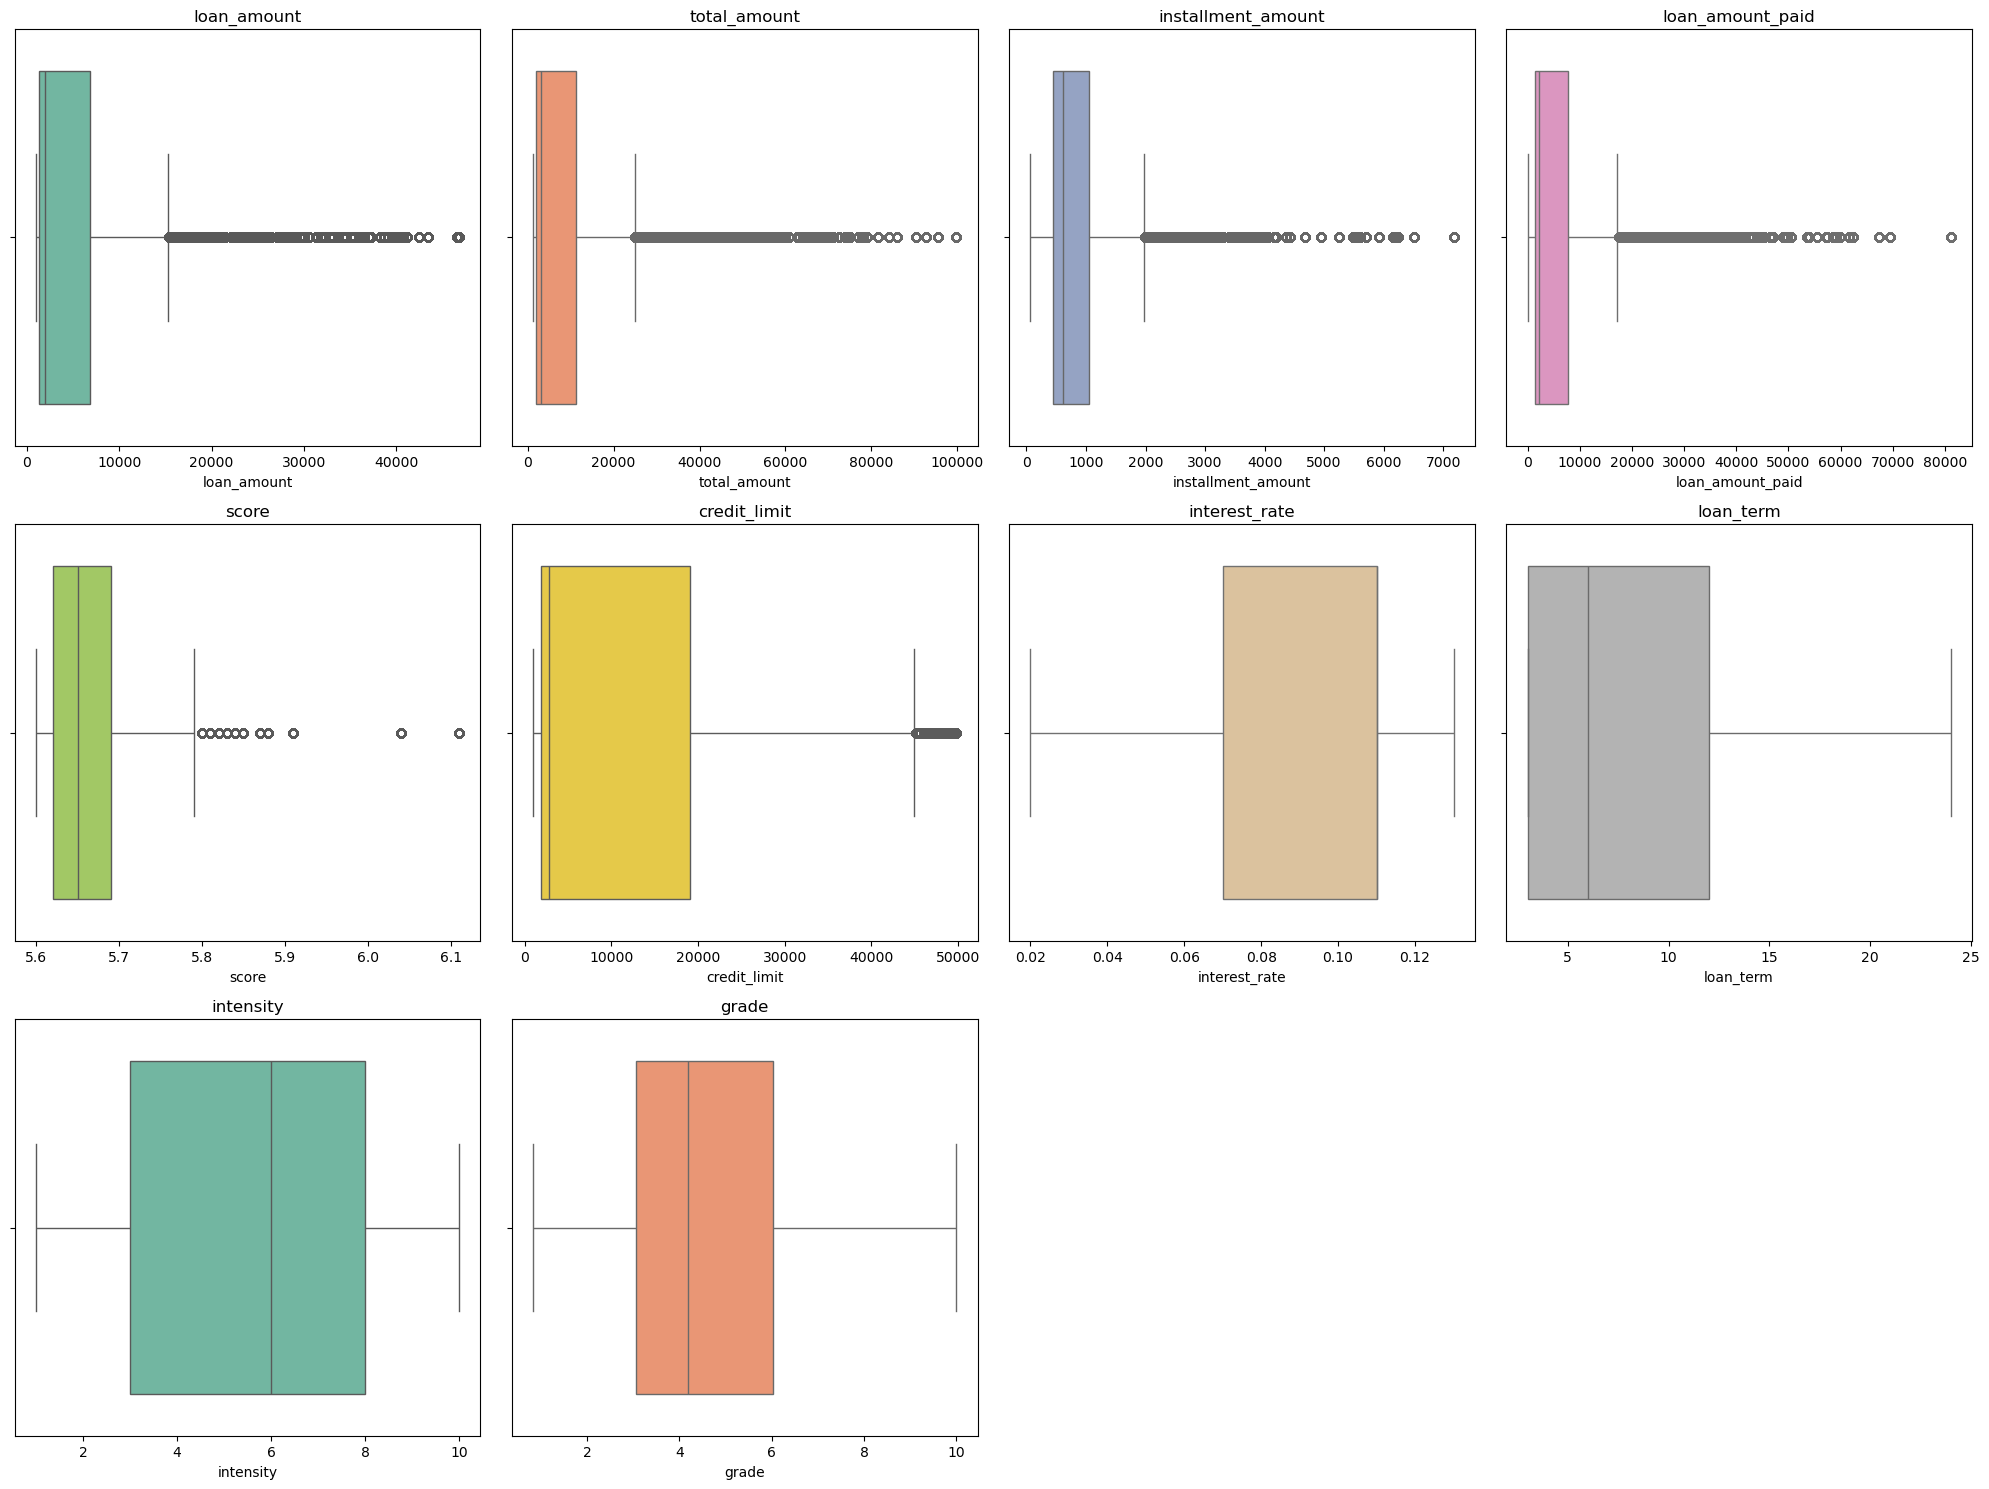

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
interest_columns = ['loan_amount', 'total_amount', 'installment_amount', 'loan_amount_paid', 'score',
                    'credit_limit', 'interest_rate', 'loan_term', 'intensity', 'grade']

# Number of rows and columns for the subplot grid
nrows = 3  # 3 rows
ncols = 4  # 4 columns (creating space for 12 plots, but only 10 are used)

# Create the subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define colors for each boxplot
palette = sns.color_palette('Set2', len(interest_columns))  # Using a color palette

# Loop through each column and create boxplot
for i, column in enumerate(interest_columns):
    sns.boxplot(x=data[column], ax=axes[i], color=palette[i])
    axes[i].set_title(column)

# Hide the remaining unused axes
for j in range(len(interest_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Outliers treatment / Removing outliers

In [19]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import mstats

# Winsorization function
def winsorize_data(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    for column in columns:
        # Winsorize the column
        df[column] = mstats.winsorize(df[column], limits=[lower_percentile, 1 - upper_percentile])
    return df

# IQR Method to remove outliers
def remove_outliers_iqr(df, columns, multiplier=1.5):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # 1st Quartile
        Q3 = df[column].quantile(0.75)   # 3rd Quartile
        IQR = Q3 - Q1
        
        # Filtering the outliers
        df = df[(df[column] >= (Q1 - multiplier * IQR)) & (df[column] <= (Q3 + multiplier * IQR))]
    return df

# Z-Score Method to remove outliers
def remove_outliers_zscore(df, columns, threshold=3):
    for column in columns:
        z_scores = np.abs(stats.zscore(df[column]))
        df = df[z_scores < threshold]
    return df

# List of numeric columns for outlier treatment
numeric_columns_data = [
    'loan_amount', 
    'total_amount', 
    'installment_amount', 
    'loan_amount_paid', 
    'score',       
    'credit_limit'
]

# Apply Winsorization to the 'data' DataFrame
data = winsorize_data(data, numeric_columns_data)

# Remove outliers using the IQR method for all specified numeric columns
data = remove_outliers_iqr(data, numeric_columns_data)

# Remove outliers using the Z-score method
data = remove_outliers_zscore(data, numeric_columns_data)

# Check the result
print(data.describe())


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


            loan_id       user_id   loan_amount  total_amount  \
count  2.145209e+06  2.145209e+06  2.145209e+06  2.145209e+06   
mean   5.917974e+02  3.544257e+02  1.458005e+03  2.253443e+03   
std    3.458574e+02  2.144586e+02  4.144926e+02  7.065953e+02   
min    5.000000e+00  4.000000e+00  1.012000e+03  1.470980e+03   
25%    2.950000e+02  1.690000e+02  1.105000e+03  1.716440e+03   
50%    6.050000e+02  3.550000e+02  1.320000e+03  2.021600e+03   
75%    8.850000e+02  5.300000e+02  1.765000e+03  2.639610e+03   
max    1.188000e+03  7.340000e+02  2.623000e+03  4.670160e+03   

       installment_amount  loan_amount_paid         score  credit_limit  \
count        2.145209e+06      2.145209e+06  2.145209e+06  2.145209e+06   
mean         5.329939e+02      1.632585e+03  5.631014e+00  1.986321e+03   
std          2.018370e+02      6.673311e+02  1.951004e-02  6.102242e+02   
min          2.766700e+02      4.885900e+02  5.600000e+00  1.100000e+03   
25%          3.643700e+02      1.210730

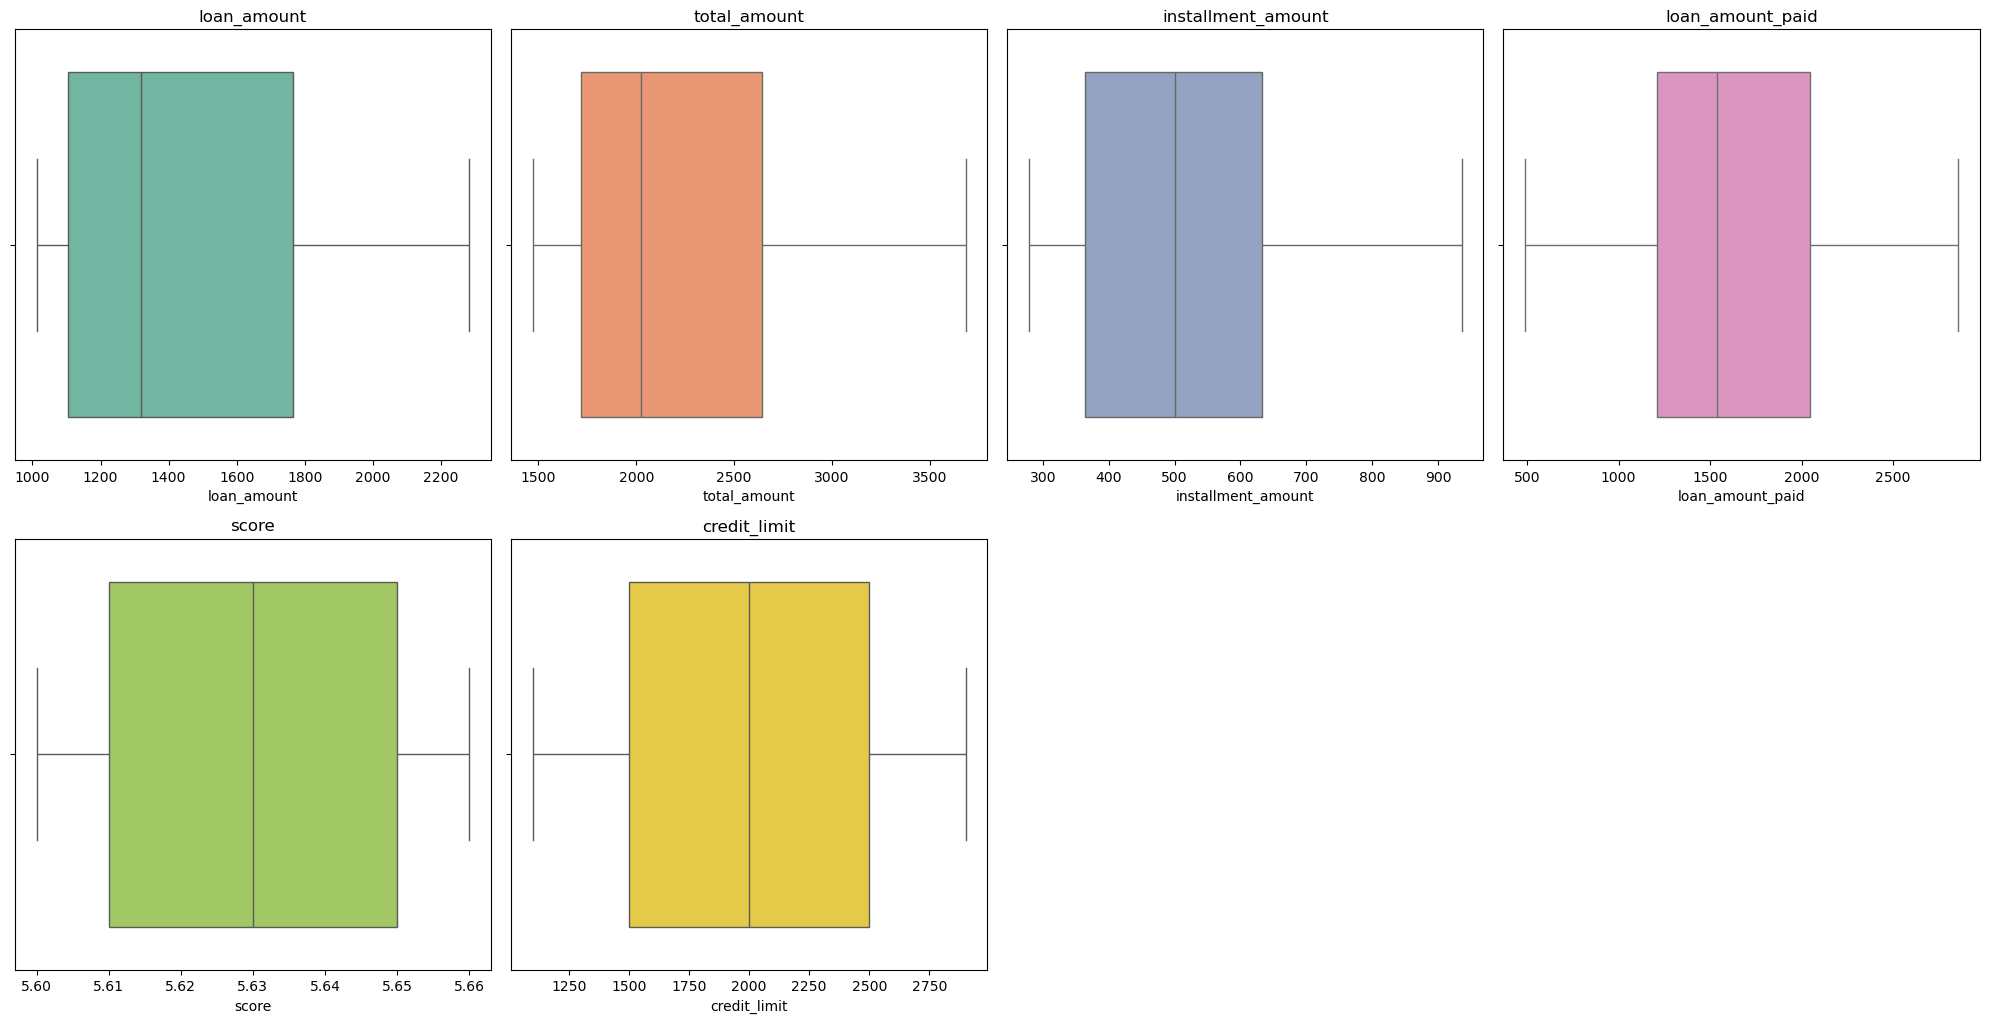

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
interest_columns = ['loan_amount', 
                    'total_amount', 
                    'installment_amount', 
                    'loan_amount_paid', 
                    'score',       
                    'credit_limit' 
                    ]

# Number of rows and columns for the subplot grid
nrows = 3  # 3 rows
ncols = 4  # 4 columns (creating space for 12 plots, but only 10 are used)

# Create the subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define colors for each boxplot
palette = sns.color_palette('Set2', len(interest_columns))  # Using a color palette

# Loop through each column and create boxplot
for i, column in enumerate(interest_columns):
    sns.boxplot(x=data[column], ax=axes[i], color=palette[i])
    axes[i].set_title(column)

# Hide the remaining unused axes
for j in range(len(interest_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

EDA (Exploratpory Data Analysis) - Four Moment Business decisions

In [29]:
import pandas as pd

# Define the columns of interest from the merged data
numerical_columns = ['loan_amount', 'total_amount', 'installment_amount', 'loan_amount_paid', 'score',       
                     'credit_limit', 'interest_rate', 'loan_term', 'intensity', 'grade']

categorical_columns = ['approved_date', 'denied_date', 'timestamp', 'time_of_day', 
                       'primary_emotion', 'relationship', 'situation', 'location', 
                       'weather', 'physical_state', 'preceding_event', 'issue_date', 
                       'due_date', 'paid_date', 'status']

# Step 1: Calculate mean for numerical columns
mean_values = data[numerical_columns].mean()
print("Mean (Numerical Columns):")
print(mean_values)

# Step 2: Calculate median for numerical columns
median_values = data[numerical_columns].median()
print("\nMedian (Numerical Columns):")
print(median_values)

# Step 3: Calculate mode for categorical columns
# The .mode() function can return multiple modes. We'll take the first mode (most frequent value).
mode_values = data[categorical_columns].mode().iloc[0]  # Get first mode value for each column
print("\nMode (Categorical Columns):")
print(mode_values)


Mean (Numerical Columns):
loan_amount           1449.866495
total_amount          2234.307125
installment_amount     527.863729
loan_amount_paid      1617.750801
score                    5.630597
credit_limit          1975.919782
interest_rate            0.116995
loan_term                4.661157
intensity                5.507879
grade                    4.599439
dtype: float64

Median (Numerical Columns):
loan_amount           1320.00
total_amount          2021.60
installment_amount     500.08
loan_amount_paid      1537.38
score                    5.63
credit_limit          2000.00
interest_rate            0.11
loan_term                6.00
intensity                6.00
grade                    4.19
dtype: float64

Mode (Categorical Columns):
approved_date               2020-08-26
denied_date                 2024-05-24
timestamp          2021-01-22 10:24:25
time_of_day                      night
primary_emotion                    joy
relationship                   partner
situation   

In [31]:
print("\nVariance (Data):", data[numerical_columns].var())
print("\nStandard Deviation (Data):", data[numerical_columns].std())
print("\nRange (Data):", data[numerical_columns].max() - data[numerical_columns].min())



Variance (Data): loan_amount           156469.085025
total_amount          432824.814203
installment_amount     35707.052044
loan_amount_paid      401589.558267
score                      0.000352
credit_limit          345119.799939
interest_rate              0.000126
loan_term                  3.649088
intensity                  8.251427
grade                      3.451926
dtype: float64

Standard Deviation (Data): loan_amount           395.561734
total_amount          657.894227
installment_amount    188.963097
loan_amount_paid      633.710942
score                   0.018766
credit_limit          587.468978
interest_rate           0.011211
loan_term               1.910259
intensity               2.872530
grade                   1.857936
dtype: float64

Range (Data): loan_amount           1271.00
total_amount          2210.06
installment_amount     657.05
loan_amount_paid      2364.81
score                    0.06
credit_limit          1800.00
interest_rate            0.04
loan_term

In [33]:
print("\nSkewness (Data):\n", data[numerical_columns].skew())


Skewness (Data):
 loan_amount           0.696576
total_amount          0.765587
installment_amount    0.599001
loan_amount_paid      0.204192
score                 0.059150
credit_limit          0.008088
interest_rate        -0.129184
loan_term             1.331593
intensity            -0.002643
grade                 0.543569
dtype: float64


In [35]:
print("\nKurtosis (Data):\n", data[numerical_columns].kurt())


Kurtosis (Data):
 loan_amount          -0.754241
total_amount         -0.535123
installment_amount   -0.519888
loan_amount_paid     -0.535784
score                -1.154661
credit_limit         -1.288787
interest_rate        -0.743839
loan_term             3.148749
intensity            -1.223898
grade                -0.699740
dtype: float64


Checking the Distribution of Data using KDE, Histogram and Q-Q Plot after 4 moment business decsiosn 

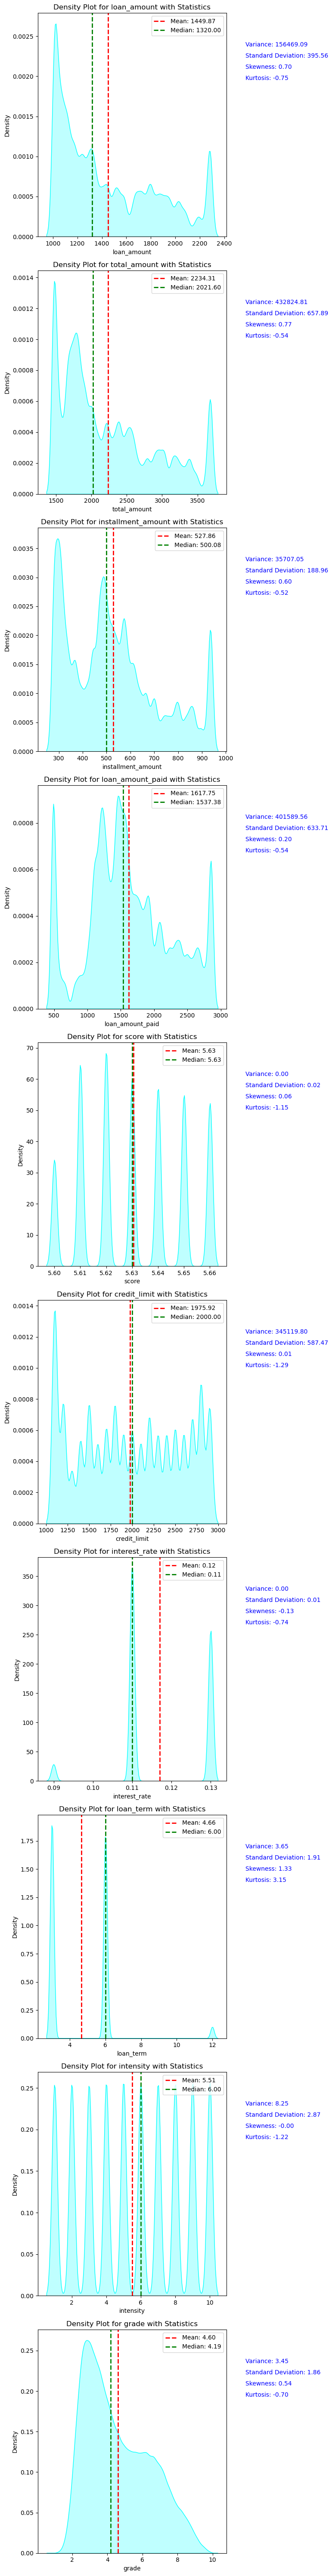

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Define the DataFrame and corresponding columns
data = data  # Your DataFrame containing all the relevant columns
columns = numerical_columns  # The specified numerical columns

# Create subplots based on the number of columns in the current dataframe
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 6 * len(columns)))

for i, column in enumerate(columns):
    data_column = data[column].dropna()  # Drop missing values for numerical analysis
    mean_val = data_column.mean()
    median_val = data_column.median()
    variance_val = data_column.var()
    std_dev_val = data_column.std()
    skewness_val = skew(data_column)
    kurtosis_val = kurtosis(data_column)

    # KDE plot with density filled
    sns.kdeplot(data_column, fill=True, ax=axes[i], color='cyan')
    axes[i].set_title(f'Density Plot for {column} with Statistics')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

    # Plot mean and median lines
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

    # Display variance, std dev, skewness, kurtosis
    annotations = [
        f'Variance: {variance_val:.2f}',
        f'Standard Deviation: {std_dev_val:.2f}',
        f'Skewness: {skewness_val:.2f}',
        f'Kurtosis: {kurtosis_val:.2f}'
    ]
    for j, annotation in enumerate(annotations):
        axes[i].text(1.1, 0.85 - 0.05 * j, annotation, transform=axes[i].transAxes, fontsize=10, color='blue')

    axes[i].legend()

# Adjust the layout and display plots for this DataFrame
plt.tight_layout()
plt.show()


4 columns are abnormal distribution (This shows the reason because most of the data is in repeated)

In [63]:
# Check the frequency of each unique value in the column
score_value_counts = data['score'].value_counts()
intensity_value_counts = data['intensity'].value_counts()
loan_term_value_counts = data['loan_term'].value_counts()

interest_rate_value_counts = data['interest_rate'].value_counts()

# Display the top repeated values for each column
print("Top repeated values for 'score':")
print(score_value_counts.head(10))

print("\nTop repeated values for 'intensity':")
print(intensity_value_counts.head(10))

print("\nTop repeated values for 'loan_term':")
print(loan_term_value_counts.head(10))

print("\nTop repeated values for 'interest_rate':")
print(interest_rate_value_counts.head(10))


Top repeated values for 'score':
score
5.62    376230
5.61    353931
5.63    328818
5.64    312814
5.65    300716
5.66    286019
5.60    186681
Name: count, dtype: int64

Top repeated values for 'intensity':
intensity
5.0     215866
10.0    215750
9.0     215527
4.0     214808
8.0     214607
7.0     214104
2.0     213902
6.0     213889
1.0     213622
3.0     213134
Name: count, dtype: int64

Top repeated values for 'loan_term':
loan_term
3.0     1070590
6.0     1018007
12.0      56612
Name: count, dtype: int64

Top repeated values for 'interest_rate':
interest_rate
0.11    1208659
0.13     843434
0.09      93116
Name: count, dtype: int64


Number of unique values for 'score': 7
Number of unique values for 'intensity': 10
Number of unique values for 'loan_term': 3
Number of unique values for 'interest_rate': 3


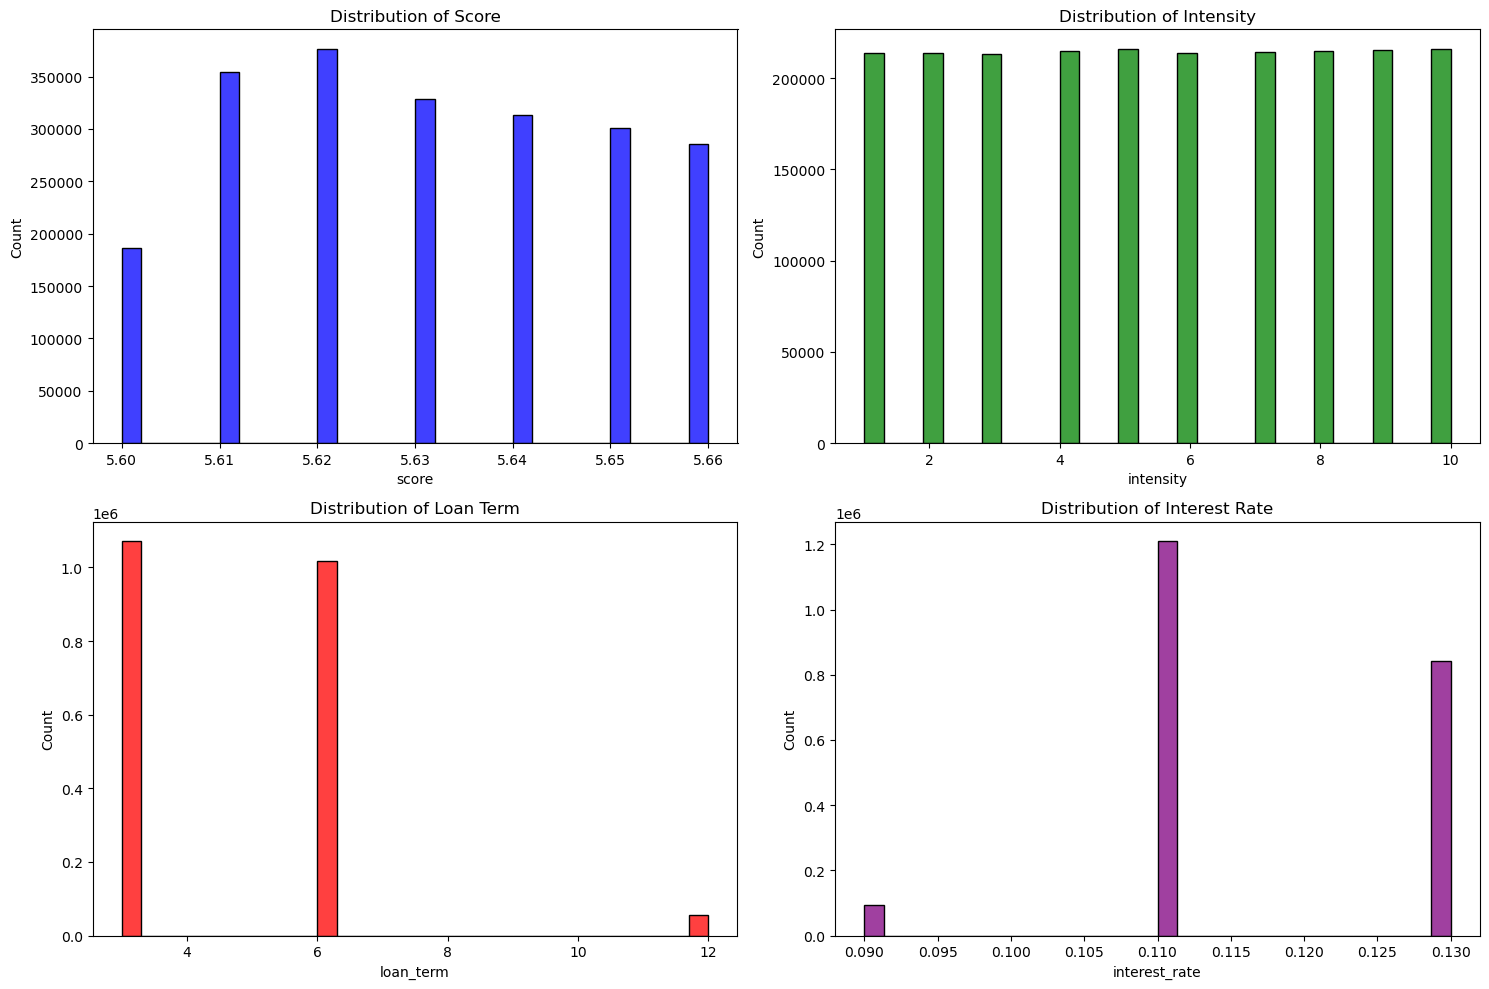

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print number of unique values for each column
print("Number of unique values for 'score':", data['score'].nunique())
print("Number of unique values for 'intensity':", data['intensity'].nunique())
print("Number of unique values for 'loan_term':", data['loan_term'].nunique())
print("Number of unique values for 'interest_rate':", data['interest_rate'].nunique())

# Create subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for 4 histograms

# Plot histogram for 4 Columns
sns.histplot(data['score'], bins=30, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Score')

sns.histplot(data['intensity'], bins=30, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Intensity')

sns.histplot(data['loan_term'], bins=30, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Distribution of Loan Term')

sns.histplot(data['interest_rate'], bins=30, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribution of Interest Rate')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()



Distribution of data using Histogram

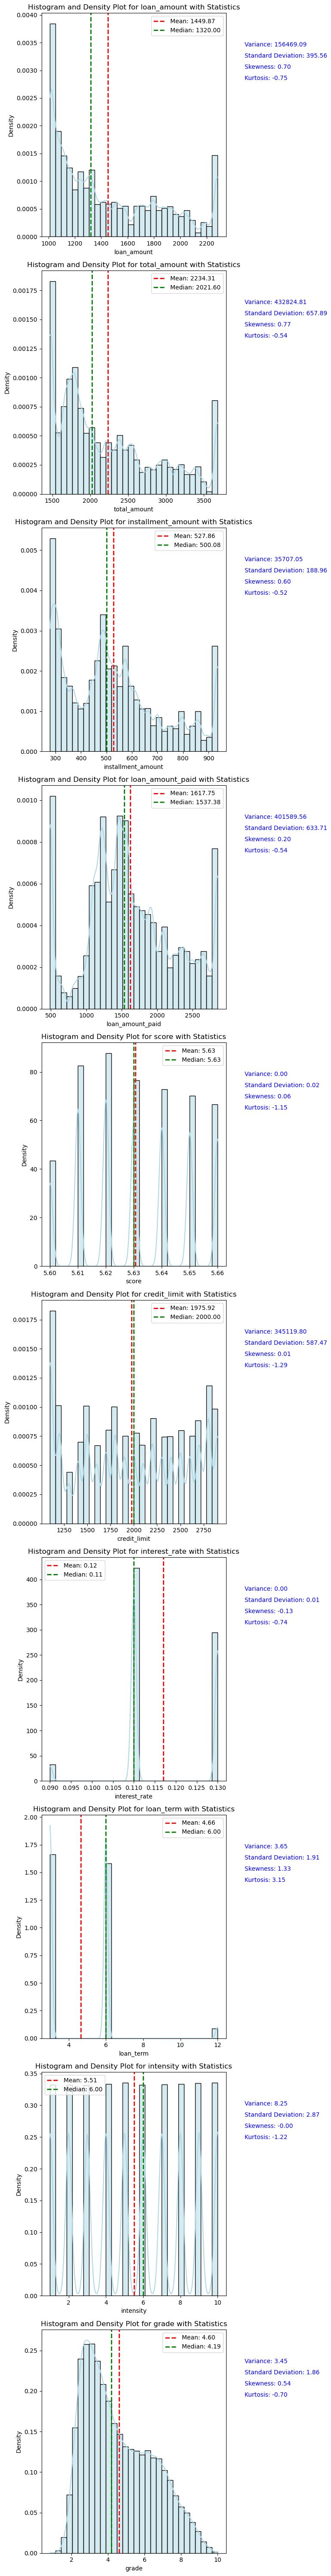

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Define the DataFrame and corresponding columns
data = data  # Your DataFrame containing all the relevant columns
columns = numerical_columns  # The specified numerical columns

# Create subplots based on the number of columns in the current dataframe
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 6 * len(columns)))

for i, column in enumerate(columns):
    data_column = data[column].dropna()  # Drop missing values for numerical analysis
    mean_val = data_column.mean()
    median_val = data_column.median()
    variance_val = data_column.var()
    std_dev_val = data_column.std()
    skewness_val = skew(data_column)
    kurtosis_val = kurtosis(data_column)

    # Plot histogram
    sns.histplot(data_column, bins=30, kde=True, ax=axes[i], color='lightblue', stat="density", alpha=0.5)
    axes[i].set_title(f'Histogram and Density Plot for {column} with Statistics')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

    # Plot mean and median lines
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

    # Display variance, std dev, skewness, kurtosis
    annotations = [
        f'Variance: {variance_val:.2f}',
        f'Standard Deviation: {std_dev_val:.2f}',
        f'Skewness: {skewness_val:.2f}',
        f'Kurtosis: {kurtosis_val:.2f}'
    ]
    for j, annotation in enumerate(annotations):
        axes[i].text(1.1, 0.85 - 0.05 * j, annotation, transform=axes[i].transAxes, fontsize=10, color='blue')

    axes[i].legend()

# Adjust the layout and display plots for this DataFrame
plt.tight_layout()
plt.show()


Distribution of data using Q-Q Plot

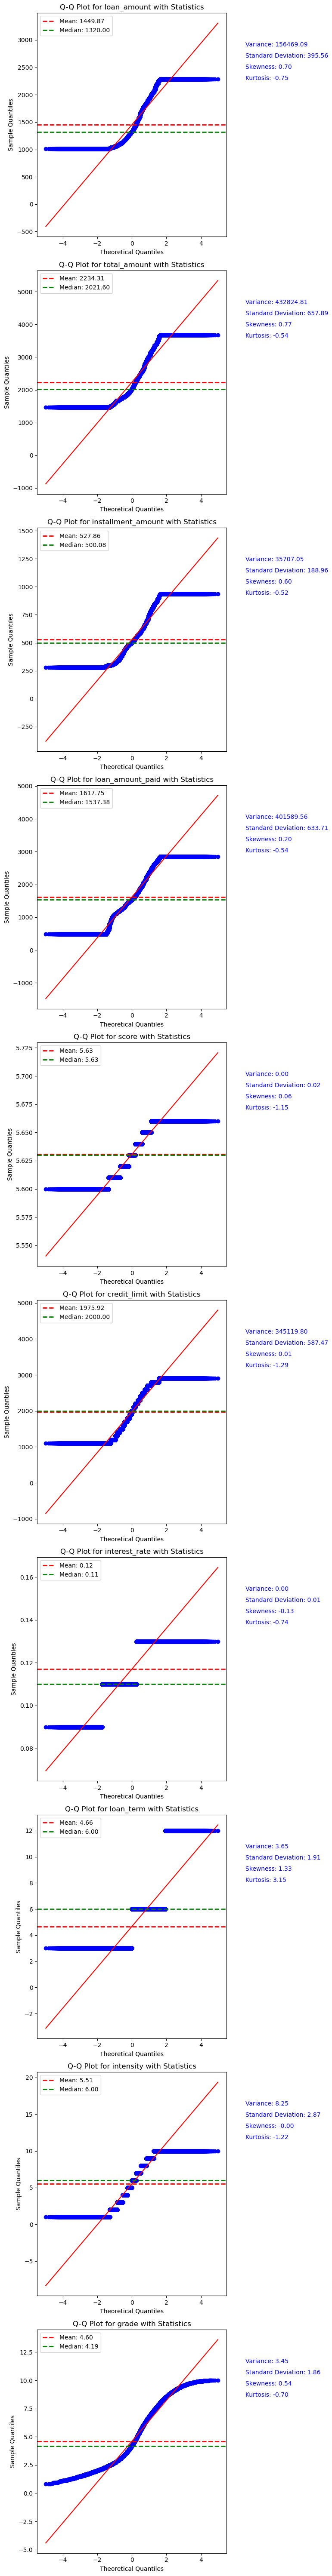

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, probplot

# Define the DataFrame and corresponding columns
data = data  # Your DataFrame containing all the relevant columns
columns = numerical_columns  # The specified numerical columns

# Create subplots based on the number of columns in the current dataframe
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 6 * len(columns)))

for i, column in enumerate(columns):
    data_column = data[column].dropna()  # Drop missing values for numerical analysis
    mean_val = data_column.mean()
    median_val = data_column.median()
    variance_val = data_column.var()
    std_dev_val = data_column.std()
    skewness_val = skew(data_column)
    kurtosis_val = kurtosis(data_column)

    # Q-Q plot
    probplot(data_column, dist="norm", plot=axes[i])  # Create Q-Q plot
    axes[i].set_title(f'Q-Q Plot for {column} with Statistics')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')

    # Display mean and median lines on the Q-Q plot (optional, for reference)
    axes[i].axhline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axhline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

    # Display variance, std dev, skewness, kurtosis
    annotations = [
        f'Variance: {variance_val:.2f}',
        f'Standard Deviation: {std_dev_val:.2f}',
        f'Skewness: {skewness_val:.2f}',
        f'Kurtosis: {kurtosis_val:.2f}'
    ]
    for j, annotation in enumerate(annotations):
        axes[i].text(1.1, 0.85 - 0.05 * j, annotation, transform=axes[i].transAxes, fontsize=10, color='blue')

    axes[i].legend()

# Adjust the layout and display plots for this DataFrame
plt.tight_layout()
plt.show()


KDE, Histogram and Q-Q Plot for easy comparision

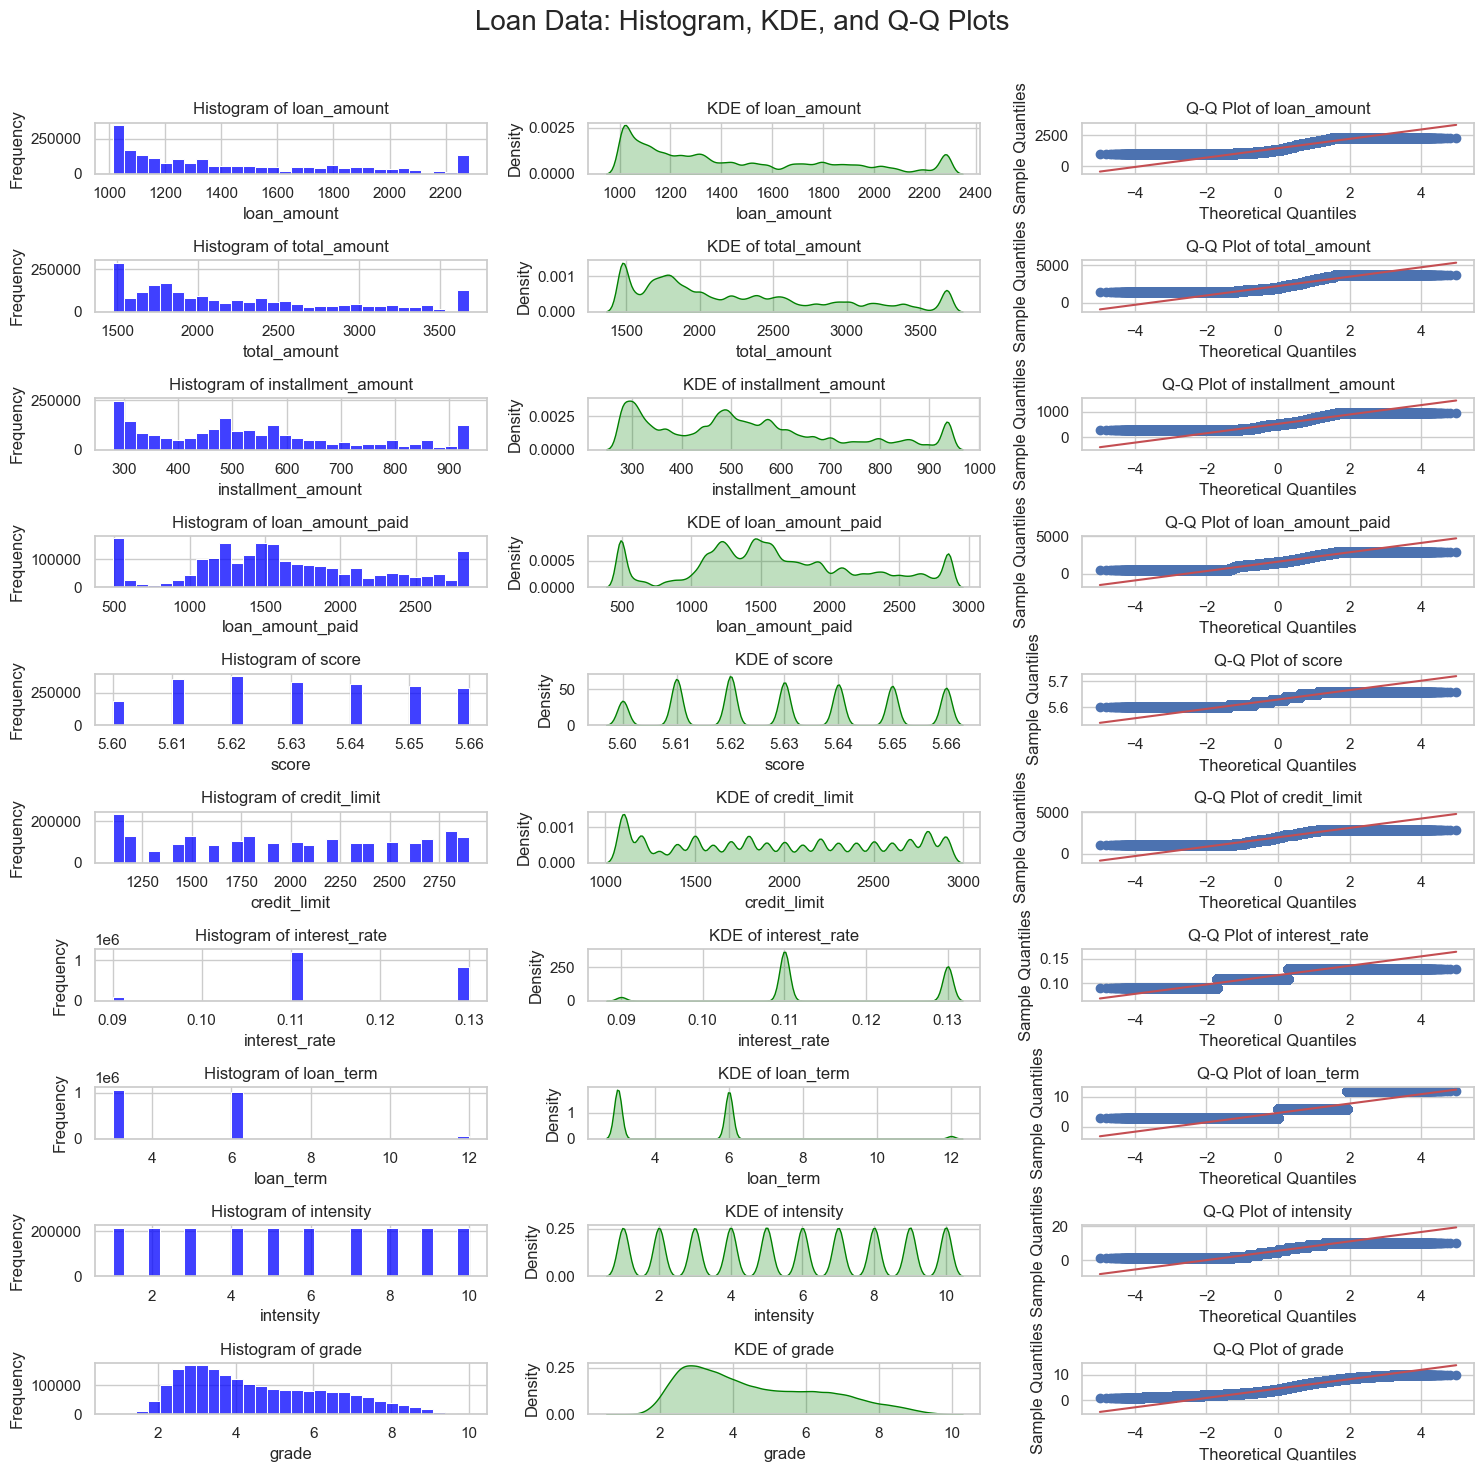

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

# Assuming 'data' is your DataFrame imported from the .db file
# If you haven't already, replace 'data' with your actual DataFrame variable

# Set up the plot aesthetics
sns.set(style="whitegrid")

# Function to plot Histogram, KDE, and Q-Q plots
def plot_hist_kde_qq(dataframe, columns, title):
    plt.figure(figsize=(15, 15))  # Define plot size
    for idx, column in enumerate(columns):
        # Histogram
        plt.subplot(len(columns), 3, 3 * idx + 1)
        sns.histplot(dataframe[column].dropna(), kde=False, bins=30, color='blue')  # Drop NaN values
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # KDE Plot
        plt.subplot(len(columns), 3, 3 * idx + 2)
        sns.kdeplot(dataframe[column].dropna(), fill=True, color='green')  # Drop NaN values
        plt.title(f'KDE of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')

        # Q-Q Plot
        plt.subplot(len(columns), 3, 3 * idx + 3)
        stats.probplot(dataframe[column].dropna(), dist="norm", plot=plt)  # Drop NaN values
        plt.title(f'Q-Q Plot of {column}')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Sample Quantiles')

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Call the function for the desired columns
plot_hist_kde_qq(data, numerical_columns, 'Loan Data: Histogram, KDE, and Q-Q Plots')


       loan_id  user_id  loan_amount  total_amount  issue_date    due_date  \
13163        5        4     0.118231      0.141982  2021-03-09  2021-06-07   
13164        5        4     0.118231      0.141982  2021-03-09  2021-06-07   
13165        5        4     0.118231      0.141982  2021-03-09  2021-06-07   
13166        5        4     0.118231      0.141982  2021-03-09  2021-06-07   
13167        5        4     0.118231      0.141982  2021-03-09  2021-06-07   

        paid_date  installment_amount  loan_amount_paid status  ...  \
13163  2021-03-29            1.202971          0.410827   paid  ...   
13164  2021-03-29            1.202971          0.410827   paid  ...   
13165  2021-03-29            1.202971          0.410827   paid  ...   
13166  2021-03-29            1.202971          0.410827   paid  ...   
13167  2021-03-29            1.202971          0.410827   paid  ...   

       primary_emotion relationship         situation      location  weather  \
13163          anxiety  

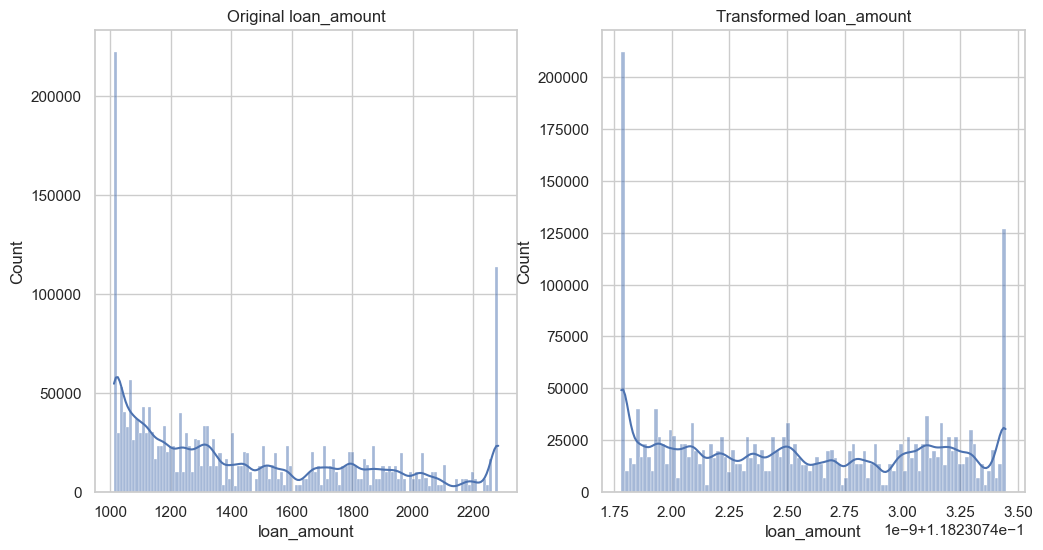

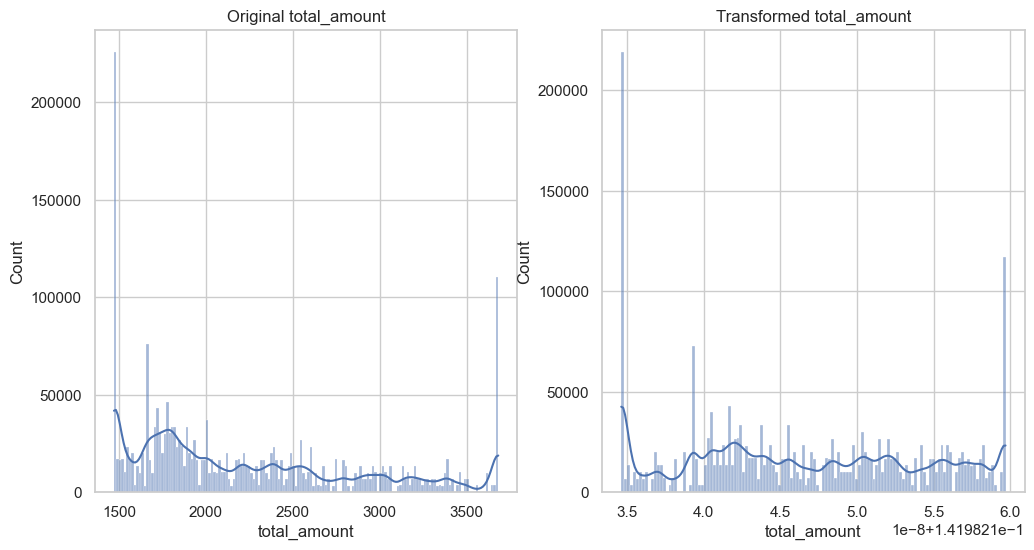

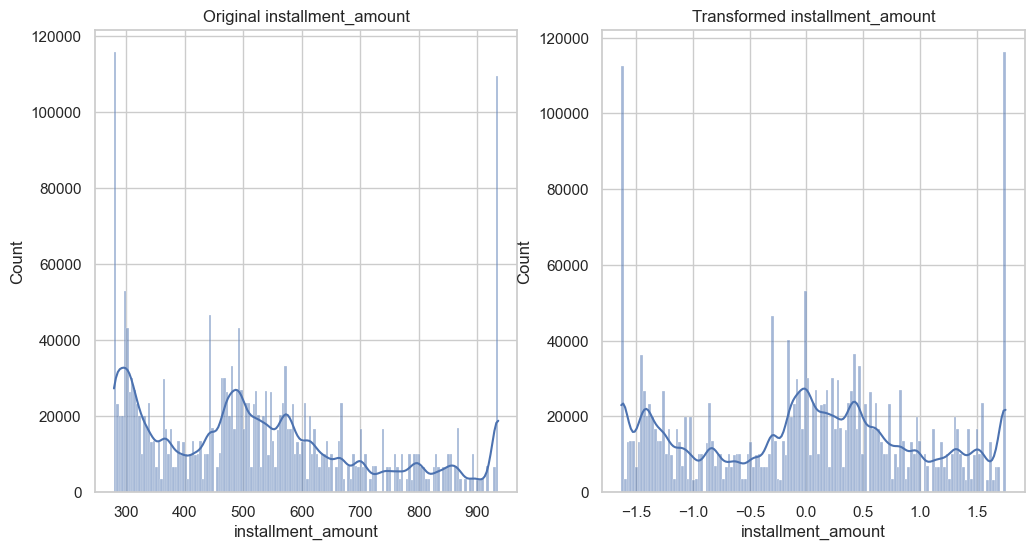

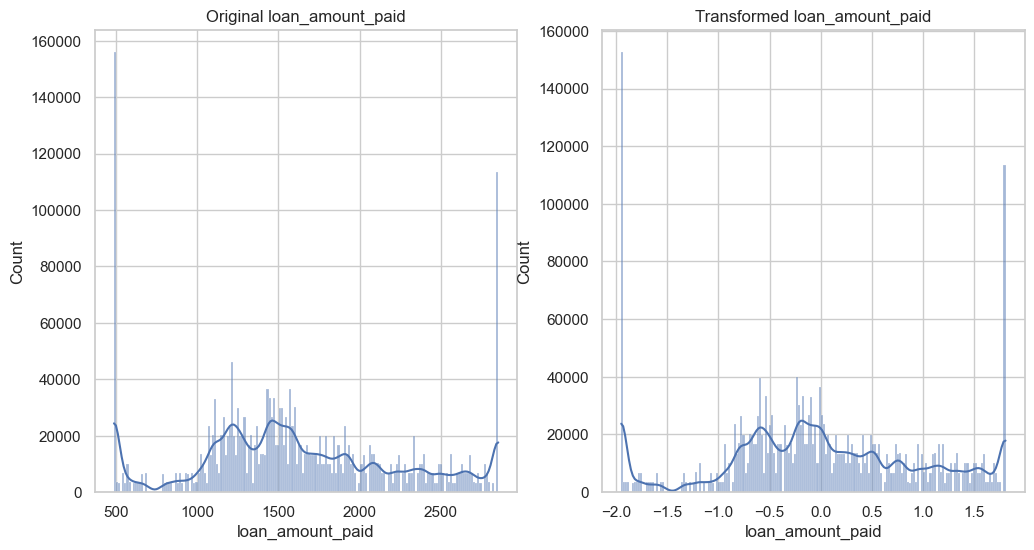

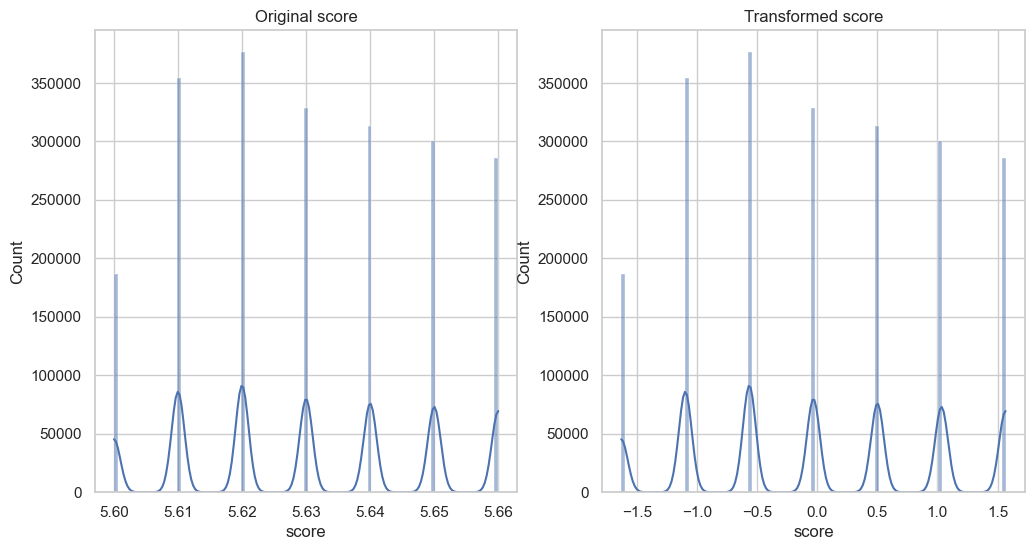

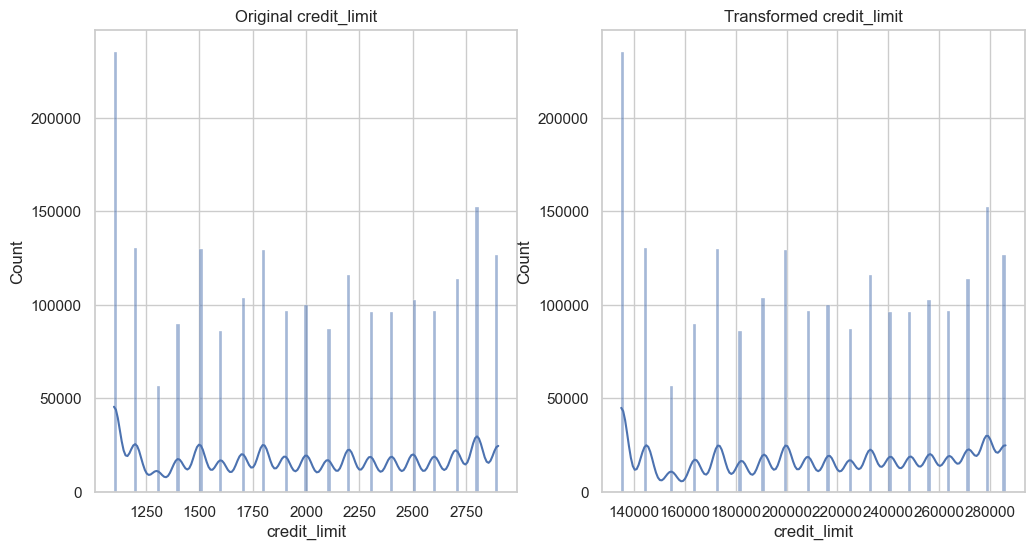

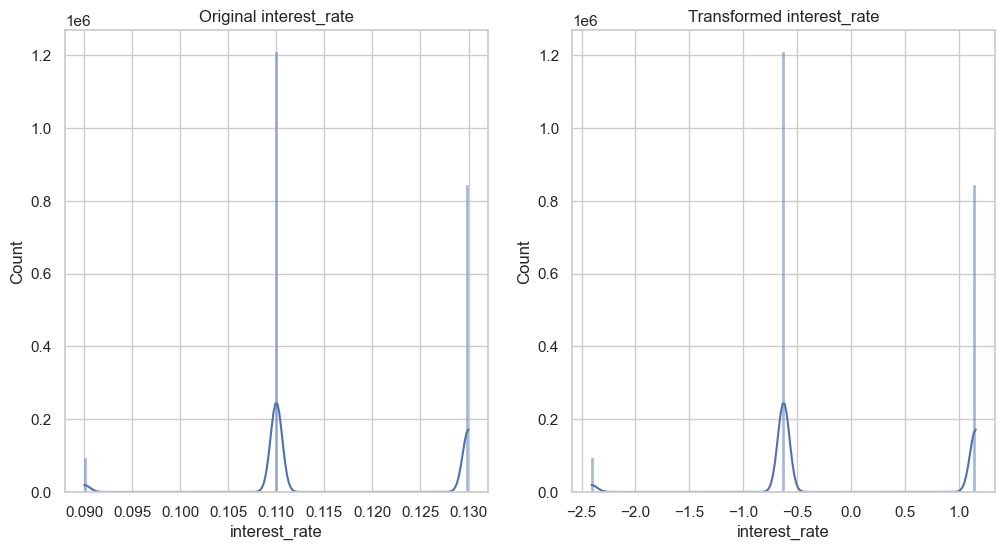

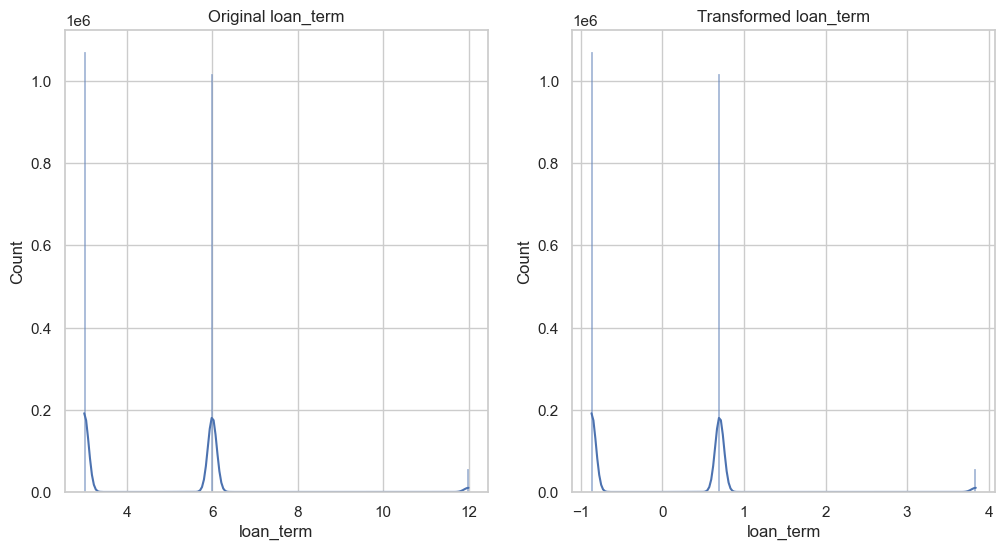

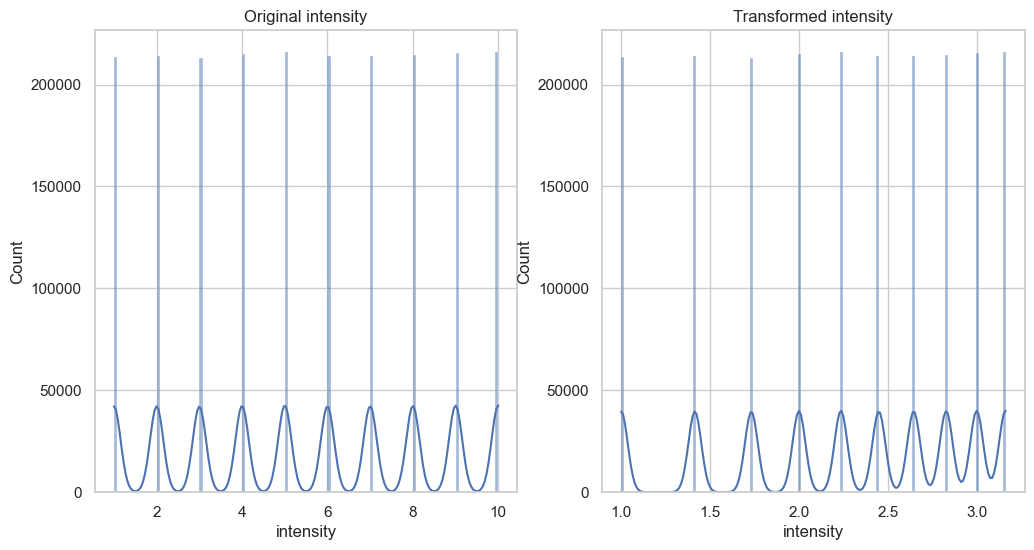

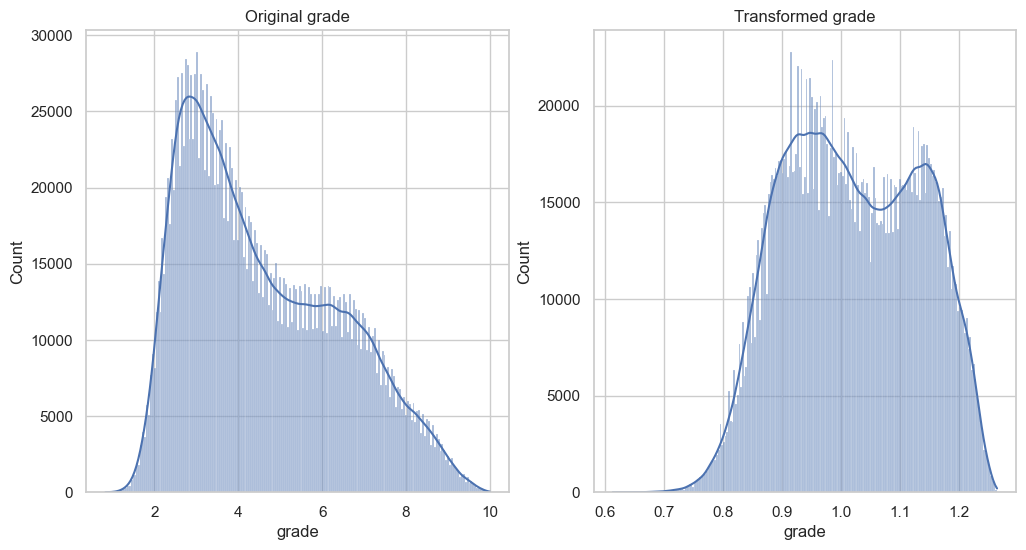

In [82]:
# Transformation to Normal Distribution
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import PowerTransformer, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your merged DataFrame is named 'data'
# Make a copy to avoid modifying the original data
data_transformed = data.copy()

# Log Transformation (Adding 1 to avoid log(0) issue)
columns_log = ['loan_amount', 'total_amount', 'installment_amount', 'loan_amount_paid', 'credit_limit']
data_transformed[columns_log] = data_transformed[columns_log].apply(lambda x: np.log1p(x))  # log1p = log(x + 1)

# Square Root Transformation
columns_sqrt = ['intensity', 'grade']
data_transformed[columns_sqrt] = data_transformed[columns_sqrt].apply(lambda x: np.sqrt(x))

# Box-Cox Transformation (only works for positive values)
columns_boxcox = ['loan_amount', 'total_amount', 'credit_limit', 'grade']  # Use positive columns
for col in columns_boxcox:
    data_transformed[col], _ = stats.boxcox(data_transformed[col] + 1)  # +1 to avoid zero values

# Yeo-Johnson Transformation (handles zero and negative values)
columns_yeo_johnson = ['loan_amount_paid', 'installment_amount']  # Example columns
pt = PowerTransformer(method='yeo-johnson')  # Initialize the transformer
data_transformed[columns_yeo_johnson] = pt.fit_transform(data_transformed[columns_yeo_johnson])

# Z-Score Standardization for other numeric columns
columns_standardize = ['score', 'interest_rate', 'loan_term']  # Additional columns for standardization
scaler = StandardScaler()
data_transformed[columns_standardize] = scaler.fit_transform(data_transformed[columns_standardize])

# Display the first few rows of the transformed DataFrame
print(data_transformed.head())

# Function to visualize original vs transformed data
def plot_comparison(original, transformed, columns):
    for col in columns:
        plt.figure(figsize=(12, 6))
        
        # Original data
        plt.subplot(1, 2, 1)
        sns.histplot(original[col], kde=True)
        plt.title(f'Original {col}')
        
        # Transformed data
        plt.subplot(1, 2, 2)
        sns.histplot(transformed[col], kde=True)
        plt.title(f'Transformed {col}')
        
        plt.show()

# Specify all columns to check
columns_to_check = ['loan_amount', 'total_amount', 'installment_amount', 'loan_amount_paid', 'score', 'credit_limit', 'interest_rate', 'loan_term', 'intensity', 'grade']
plot_comparison(data, data_transformed, columns_to_check)


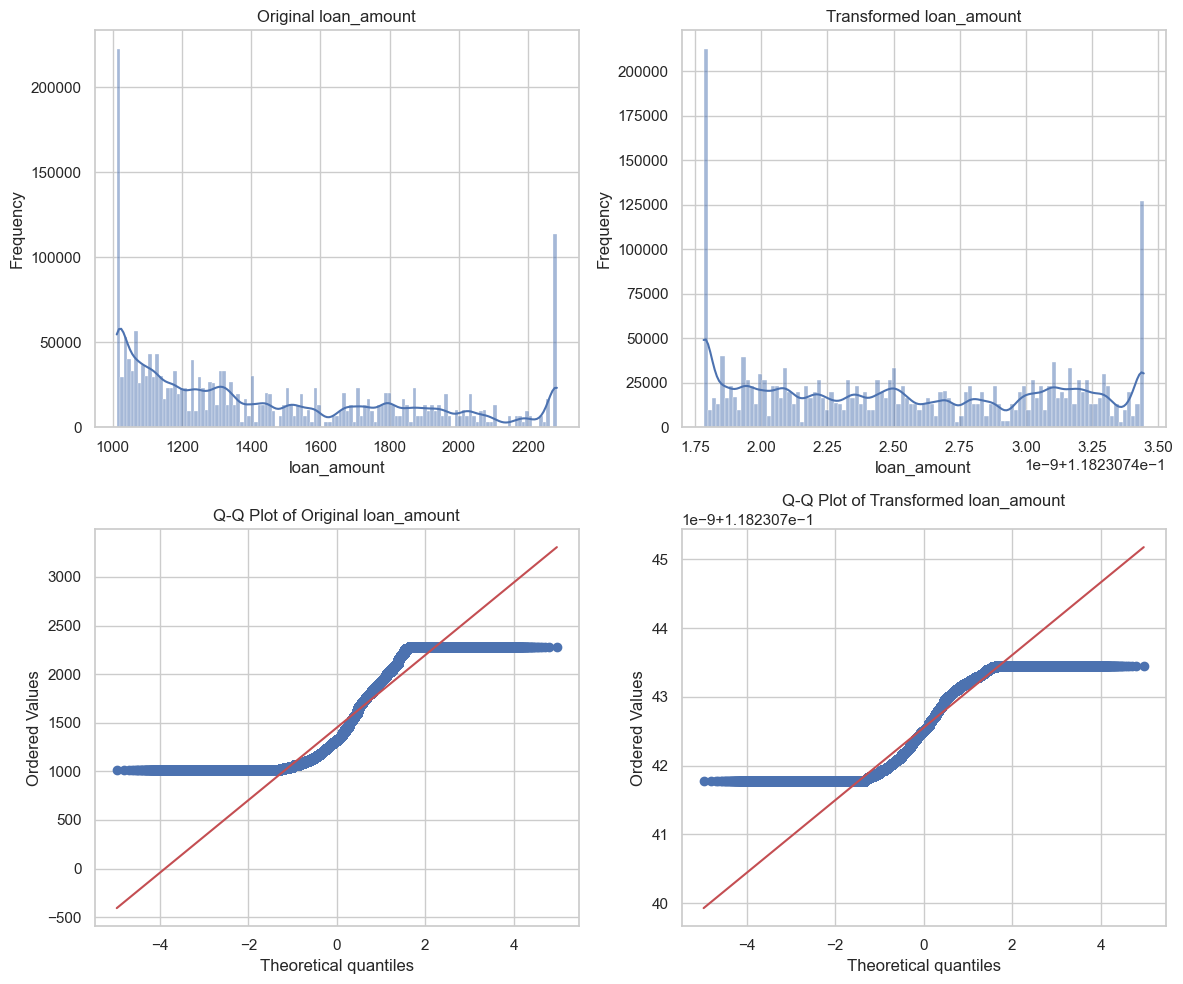

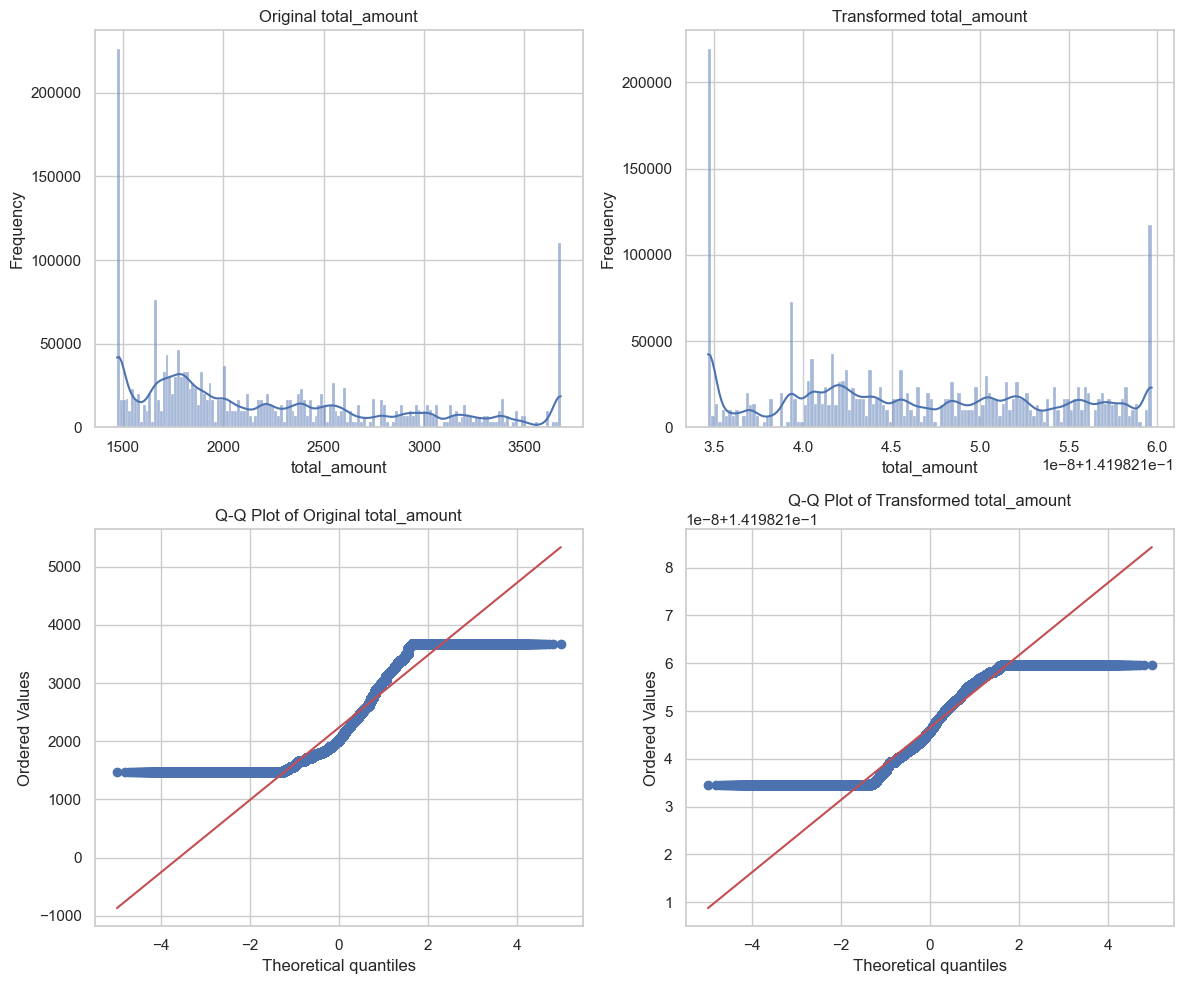

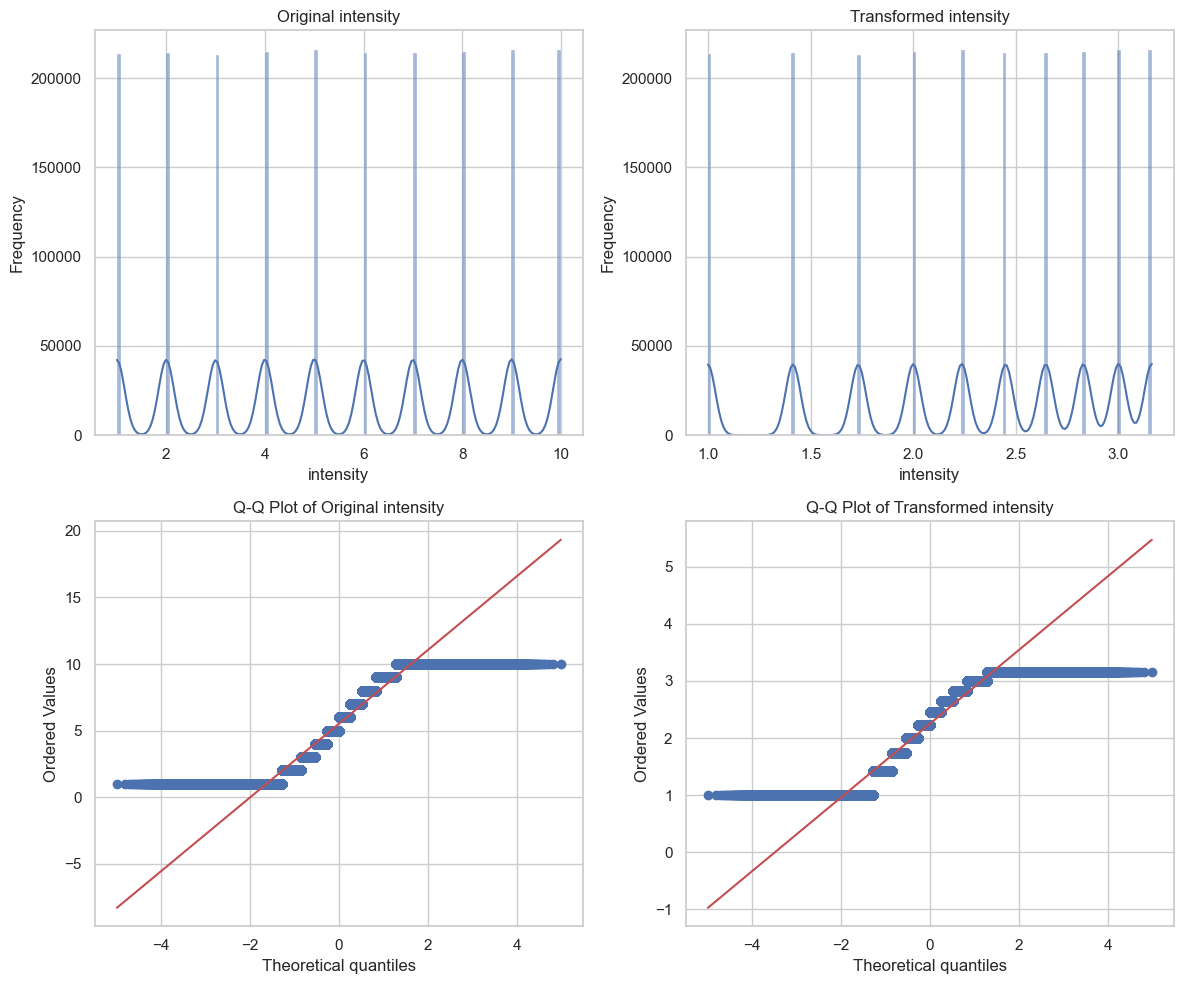

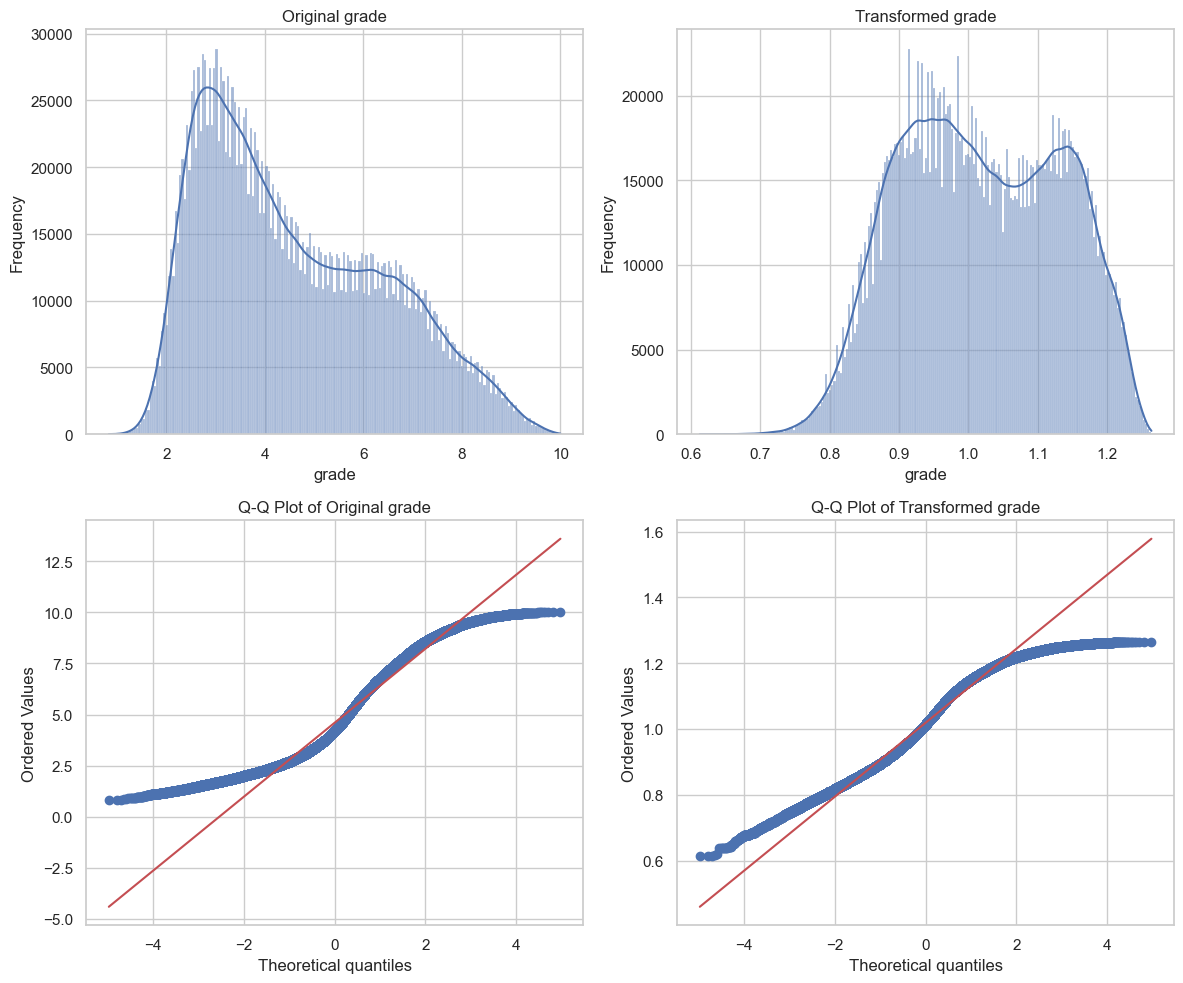

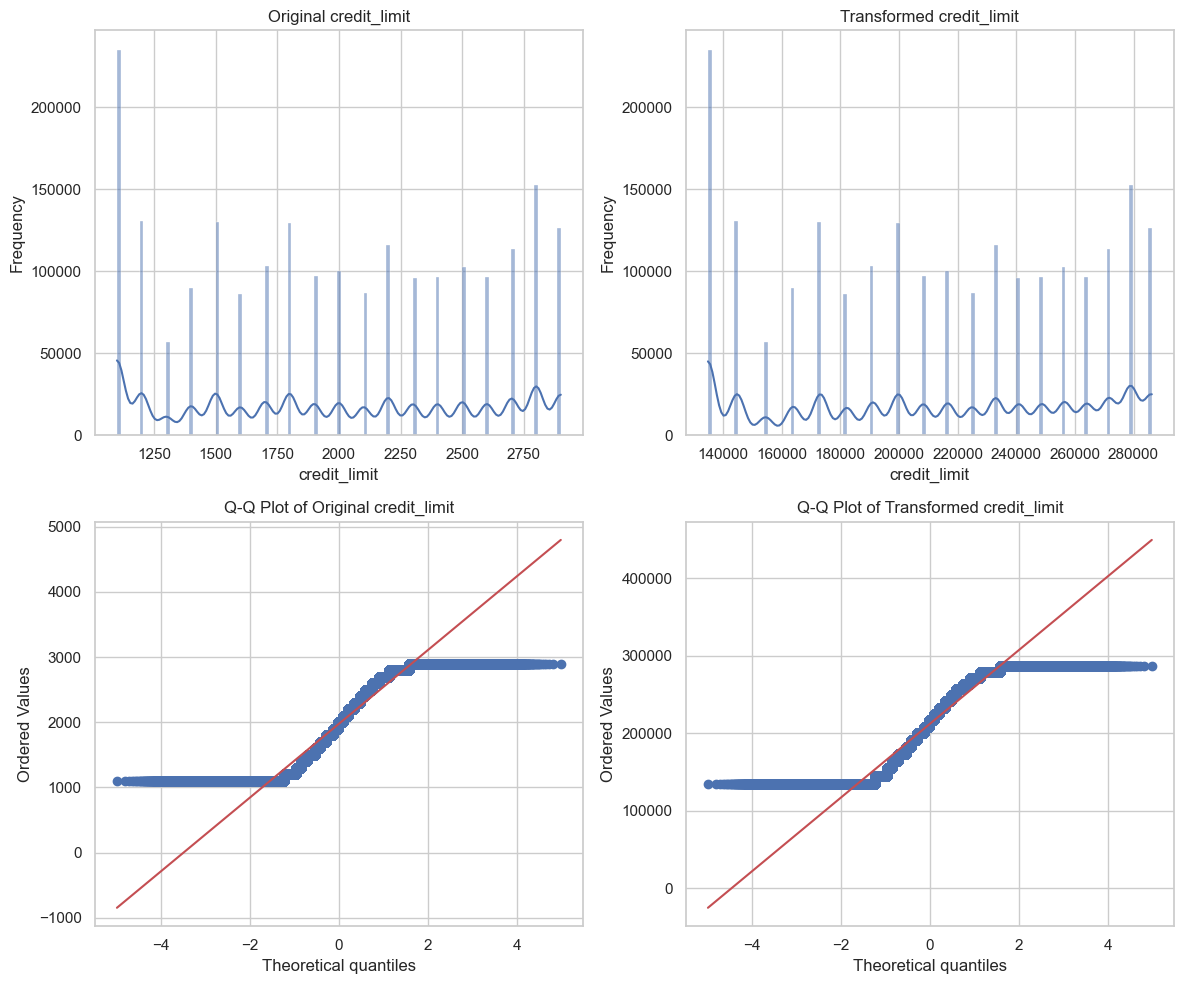

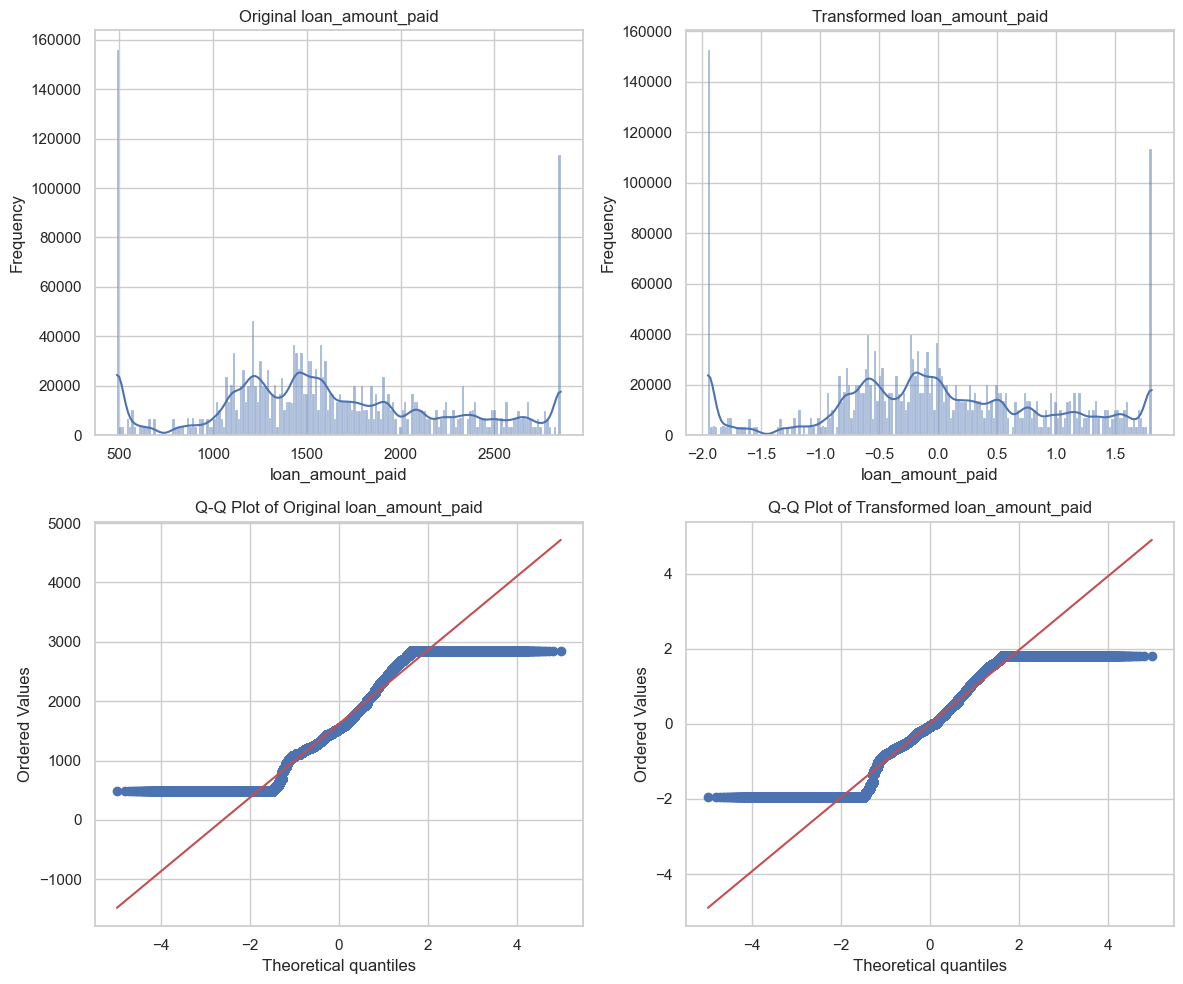

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Assuming 'data_transformed' is the DataFrame with your transformed data
columns_to_check = ['loan_amount', 'total_amount', 'intensity', 'grade', 'credit_limit', 'loan_amount_paid']

for col in columns_to_check:
    plt.figure(figsize=(12, 10))
    
    # Original Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Original {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Transformed Histogram
    plt.subplot(2, 2, 2)
    sns.histplot(data_transformed[col], kde=True)
    plt.title(f"Transformed {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Original Q-Q Plot
    plt.subplot(2, 2, 3)
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Original {col}")

    # Transformed Q-Q Plot
    plt.subplot(2, 2, 4)
    stats.probplot(data_transformed[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Transformed {col}")

    plt.tight_layout()
    plt.show()


Emotional Pattern Analysis:

Dominant Emotions for Users Over Time:
   primary_emotion  count
0              joy  52661
1             love  47914
2            pride  47587
3     anticipation  42604
4        amusement  38049
5            trust  37982
6           relief  37641
7         surprise  32978
8          sadness  18722
9          boredom  18632
10       confusion  13977
11           shame  13893
12        contempt  13881
13           guilt  13797
14     frustration   9326
15        jealousy   9268
16         disgust   9264
17            fear   4737
18         anxiety   4683


C:\Users\Admin\AppData\Local\Temp\ipykernel_13928\3763155817.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




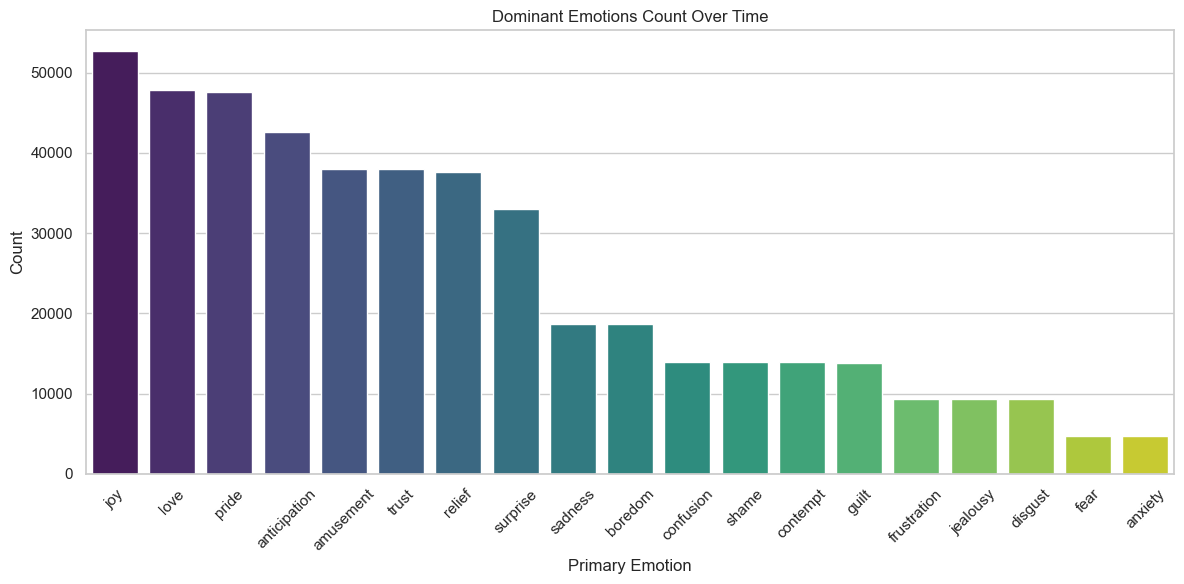


Numerical Data for Emotional Patterns by Time of Day:
       user_id time_of_day primary_emotion  intensity
0            4   afternoon       amusement   4.836364
1            4   afternoon    anticipation   5.177419
2            4   afternoon         anxiety   6.166667
3            4   afternoon         boredom   5.840909
4            4   afternoon       confusion   5.333333
...        ...         ...             ...        ...
21348      734       night          relief   5.373494
21349      734       night         sadness   5.800000
21350      734       night           shame   5.388889
21351      734       night        surprise   5.457143
21352      734       night           trust   5.456522

[21353 rows x 4 columns]


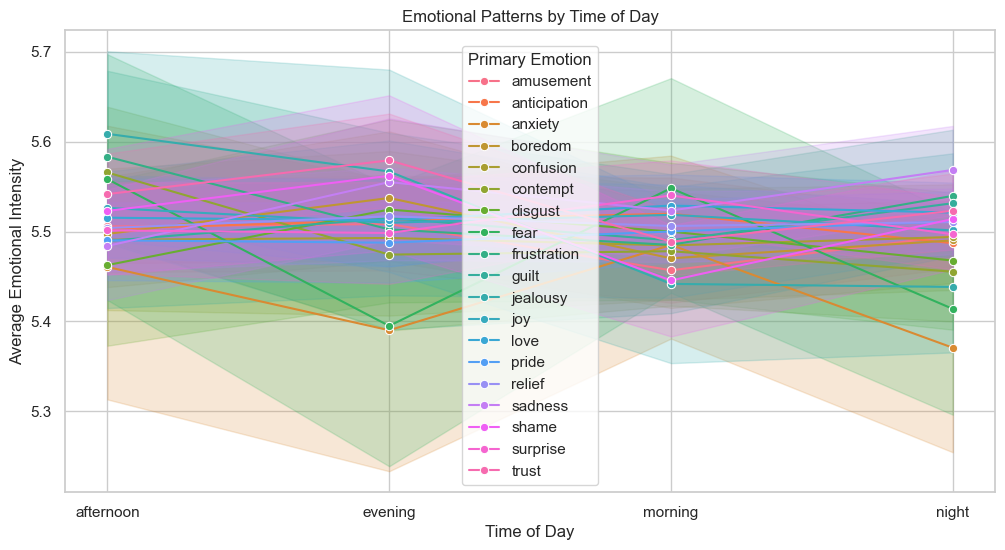


Emotion Correlation with Contexts:
      primary_emotion  relationship    situation time_of_day  counts
0           amusement  acquaintance     argument   afternoon      32
1           amusement  acquaintance     argument     evening      27
2           amusement  acquaintance     argument     morning      32
3           amusement  acquaintance     argument       night      64
4           amusement  acquaintance     cleaning   afternoon      25
...               ...           ...          ...         ...     ...
50178           trust     therapist  watching TV       night      44
50179           trust     therapist      working   afternoon      50
50180           trust     therapist      working     evening      25
50181           trust     therapist      working     morning      38
50182           trust     therapist      working       night      44

[50183 rows x 5 columns]


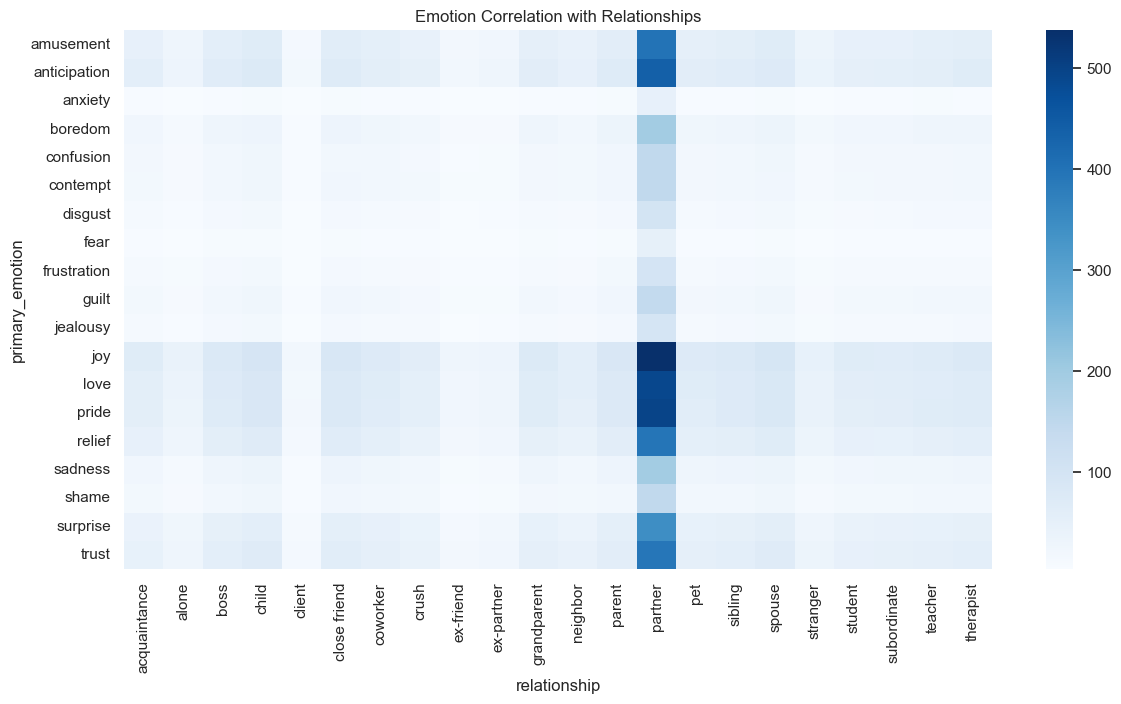

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your merged DataFrame

# Ensure 'timestamp' is in datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Identify dominant emotional patterns for users over time
# Resample data by day and find the most frequent emotion for each day
dominant_emotions = data.groupby(['user_id', data['timestamp'].dt.date])['primary_emotion'].agg(lambda x: x.value_counts().index[0]).reset_index()
dominant_emotions.rename(columns={'timestamp': 'date'}, inplace=True)  # Rename for clarity

# Count the occurrences of each dominant emotion over time
emotion_counts = dominant_emotions['primary_emotion'].value_counts().reset_index()
emotion_counts.columns = ['primary_emotion', 'count']

# Output the dominant emotions numerically
print("Dominant Emotions for Users Over Time:")
print(emotion_counts)

# Visualize dominant emotions over time
plt.figure(figsize=(12, 6))
sns.barplot(data=emotion_counts, x='primary_emotion', y='count', palette='viridis')
plt.title('Dominant Emotions Count Over Time')
plt.xlabel('Primary Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Emotional Pattern Analysis
# Group by user and time of day to identify emotional patterns over time

# Grouping by user and time of day
emotional_pattern = data.groupby(['user_id', 'time_of_day', 'primary_emotion'])['intensity'].mean().reset_index()

# Output numerical summary for emotional patterns
print("\nNumerical Data for Emotional Patterns by Time of Day:")
print(emotional_pattern)

# Visualize emotional patterns over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=emotional_pattern, x='time_of_day', y='intensity', hue='primary_emotion', marker='o')
plt.title('Emotional Patterns by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Emotional Intensity')
plt.legend(title='Primary Emotion')
plt.show()

# Analyze how emotions correlate with different contexts
context_correlation = data.groupby(['primary_emotion', 'relationship', 'situation', 'time_of_day']).size().reset_index(name='counts')

# Output the context correlation numerically
print("\nEmotion Correlation with Contexts:")
print(context_correlation)

# Visualize correlation of emotions with different contexts
plt.figure(figsize=(14, 7))
sns.heatmap(context_correlation.pivot_table(index='primary_emotion', columns='relationship', values='counts', fill_value=0), cmap='Blues')
plt.title('Emotion Correlation with Relationships')
plt.show()


Loan-Emotion Correlation


Numerical Data: Average Loan Characteristics by Primary Emotion:
   primary_emotion  avg_loan_amount  avg_interest_rate  avg_intensity
0        amusement      1449.780725           0.116916       5.488635
1     anticipation      1450.731475           0.117014       5.503777
2          anxiety      1445.627109           0.117099       5.448467
3          boredom      1449.790825           0.117117       5.502323
4        confusion      1449.878148           0.116997       5.489239
5         contempt      1448.326846           0.116965       5.485311
6          disgust      1454.605875           0.117048       5.479128
7             fear      1444.354715           0.116983       5.479795
8      frustration      1451.763208           0.116767       5.531297
9            guilt      1451.699943           0.117019       5.508270
10        jealousy      1450.353829           0.116864       5.500162
11             joy      1449.455763           0.117003       5.512675
12            love      

C:\Users\Admin\AppData\Local\Temp\ipykernel_13928\425831664.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




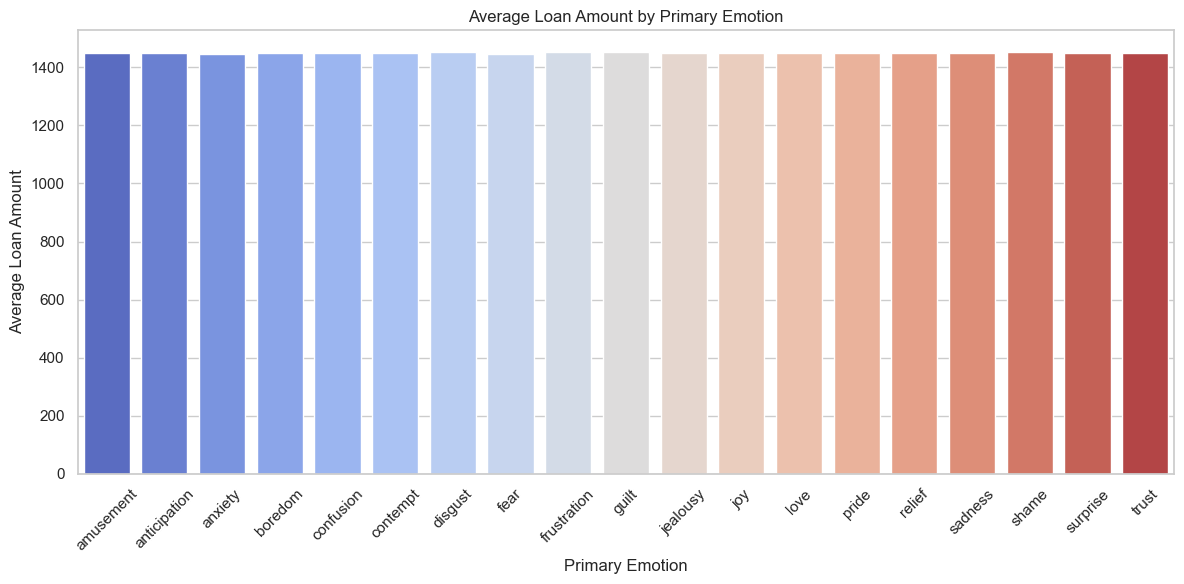

<Figure size 1200x600 with 0 Axes>

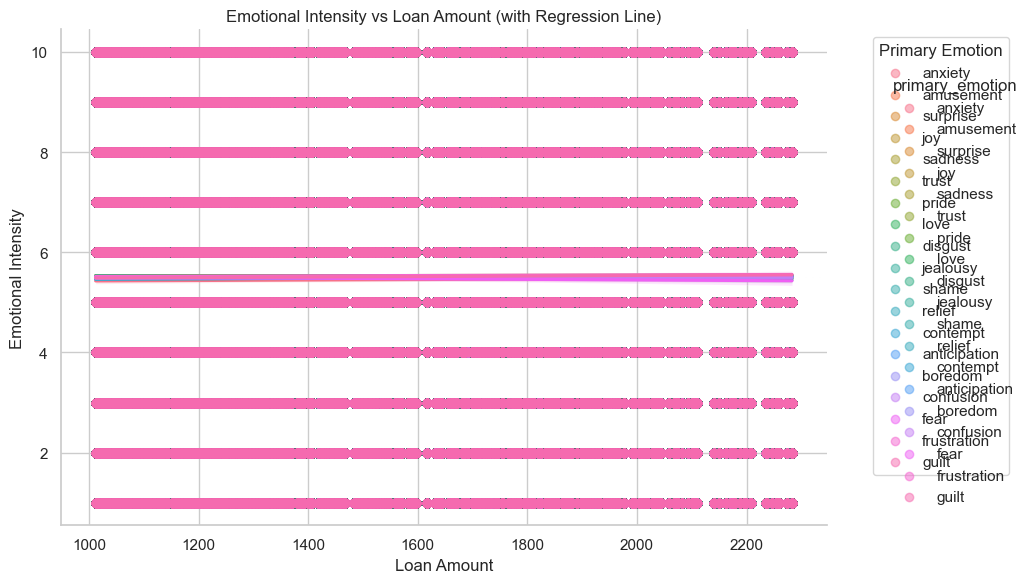

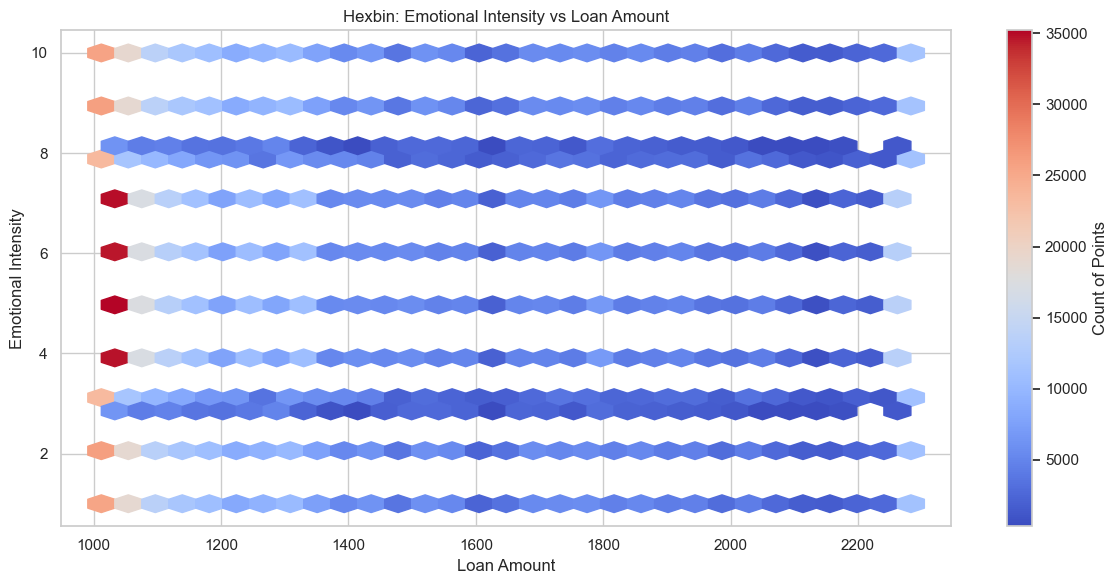


Correlation between Emotional Intensity and Loan Terms (Loan Amount, Interest Rate):
                intensity  loan_amount  interest_rate
intensity       1.000000     0.000205      -0.001603
loan_amount     0.000205     1.000000       0.034653
interest_rate  -0.001603     0.034653       1.000000


In [145]:
# Loan-Emotion Correlation
# Prepare the dataset by grouping and correlating emotional data with loan terms

# Group by primary emotion and analyze loan characteristics
emotion_loan_correlation = data.groupby('primary_emotion').agg(
    avg_loan_amount=('loan_amount', 'mean'),
    avg_interest_rate=('interest_rate', 'mean'),
    avg_intensity=('intensity', 'mean')
).reset_index()

# Display numerical data for loan-emotion correlation
print("\nNumerical Data: Average Loan Characteristics by Primary Emotion:")
print(emotion_loan_correlation)

# Visualize the correlation between emotions and loan characteristics
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_emotion', y='avg_loan_amount', data=emotion_loan_correlation, palette='coolwarm')
plt.title('Average Loan Amount by Primary Emotion')
plt.xlabel('Primary Emotion')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Enhanced Visualization: Regression Plot for Emotional Intensity vs Loan Amount
plt.figure(figsize=(12, 6))
sns.lmplot(data=data, x='loan_amount', y='intensity', hue='primary_emotion', height=6, aspect=1.5, scatter_kws={'alpha':0.5}, markers='o')
plt.title('Emotional Intensity vs Loan Amount (with Regression Line)')
plt.xlabel('Loan Amount')
plt.ylabel('Emotional Intensity')
plt.legend(title='Primary Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Alternatively: Hexbin plot for larger datasets (optional)
plt.figure(figsize=(12, 6))
plt.hexbin(data['loan_amount'], data['intensity'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Count of Points')
plt.title('Hexbin: Emotional Intensity vs Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Emotional Intensity')
plt.tight_layout()
plt.show()

# Calculate and print correlation between emotional intensity and loan terms (loan amount and interest rate)
correlation = data[['intensity', 'loan_amount', 'interest_rate']].corr()
print("\nCorrelation between Emotional Intensity and Loan Terms (Loan Amount, Interest Rate):\n", correlation)


Lending Operation Assessment

Default Rate: 0.00%

Annual Performance Summary:
   issue_year  total_loans  total_disbursed  total_revenue  avg_interest_rate  \
0        2020        46383         66206060   1.022593e+08           0.118583   
1        2021       389555        569197942   8.741888e+08           0.118573   
2        2022       558331        819412983   1.251448e+09           0.118109   
3        2023       548563        783603127   1.231584e+09           0.116076   
4        2024       425752        618713797   9.360222e+08           0.115170   
5        2025       176625        253132744   3.975534e+08           0.116833   

   defaulted_loans  profitability  
0                0   3.605324e+07  
1                0   3.049909e+08  
2                0   4.320351e+08  
3                0   4.479808e+08  
4                0   3.173084e+08  
5                0   1.444207e+08  


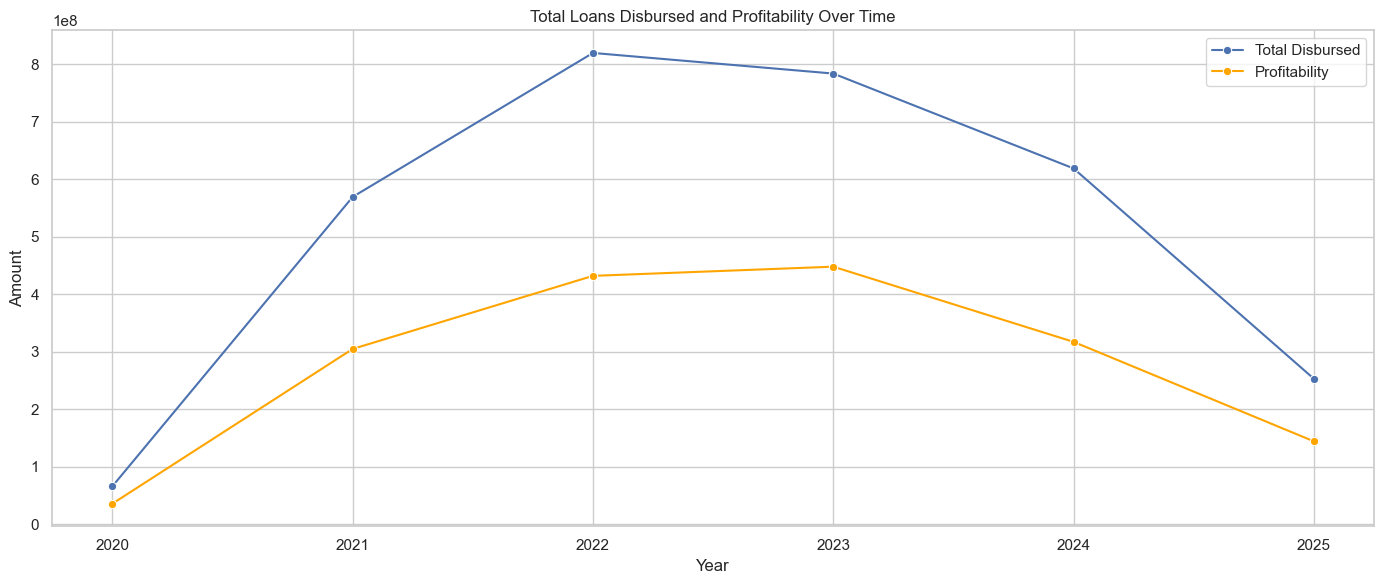

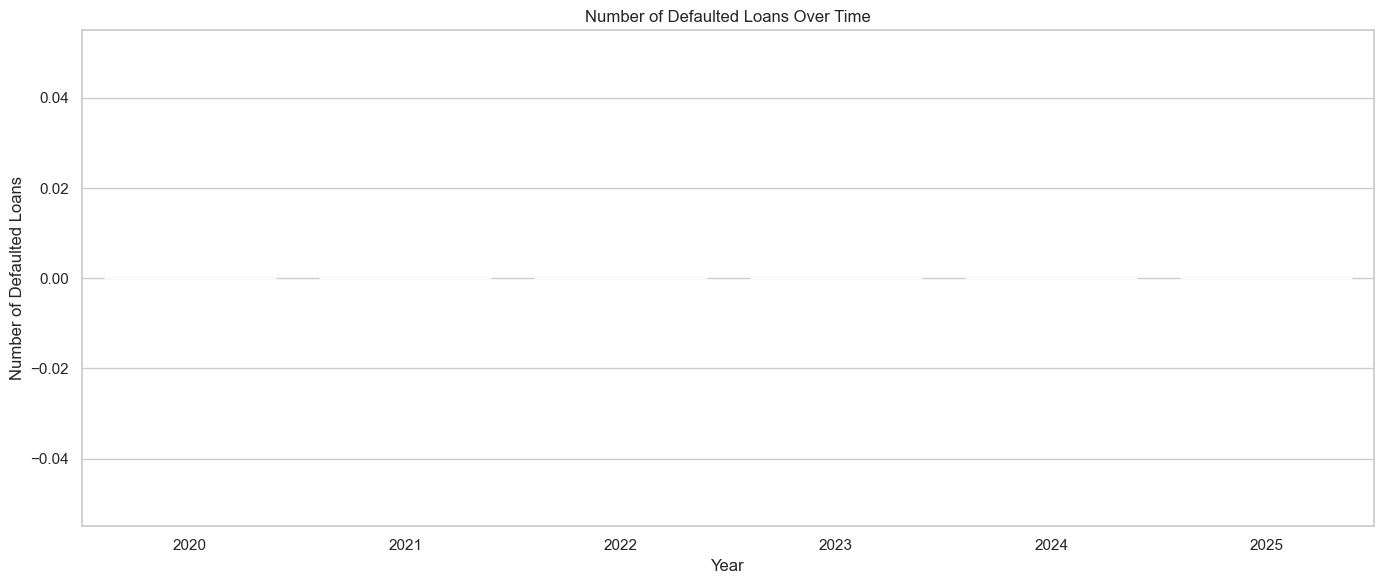


Detailed Annual Performance with Defaulted Loans:
   issue_year  defaulted_loans
0        2020                0
1        2021                0
2        2022                0
3        2023                0
4        2024                0
5        2025                0


In [149]:
# Lending Operation Assessment
# Step 1: Calculate default rate and performance trends
default_rate = (data['status'] == 'unpaid').mean() * 100
print(f"Default Rate: {default_rate:.2f}%")

# Step 2: Measure growth and profitability by year
data['issue_year'] = pd.to_datetime(data['issue_date']).dt.year

annual_performance = data.groupby('issue_year').agg(
    total_loans=('loan_amount', 'count'),
    total_disbursed=('loan_amount', 'sum'),
    total_revenue=('total_amount', 'sum'),
    avg_interest_rate=('interest_rate', 'mean'),
    defaulted_loans=('status', lambda x: (x == 'unpaid').sum())
).reset_index()

# Calculate profitability
annual_performance['profitability'] = annual_performance['total_revenue'] - annual_performance['total_disbursed']

# Print annual performance summary
print("\nAnnual Performance Summary:")
print(annual_performance)

# Step 3: Visualize growth and profitability
plt.figure(figsize=(14, 6))
sns.lineplot(x='issue_year', y='total_disbursed', data=annual_performance, marker='o', label='Total Disbursed')
sns.lineplot(x='issue_year', y='profitability', data=annual_performance, marker='o', color='orange', label='Profitability')
plt.title('Total Loans Disbursed and Profitability Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Visualize the trend of defaulted loans over time
plt.figure(figsize=(14, 6))
sns.barplot(x='issue_year', y='defaulted_loans', data=annual_performance, color='salmon')
plt.title('Number of Defaulted Loans Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Defaulted Loans')
plt.tight_layout()
plt.show()

# Print detailed information about defaulted loans
print("\nDetailed Annual Performance with Defaulted Loans:")
print(annual_performance[['issue_year', 'defaulted_loans']])


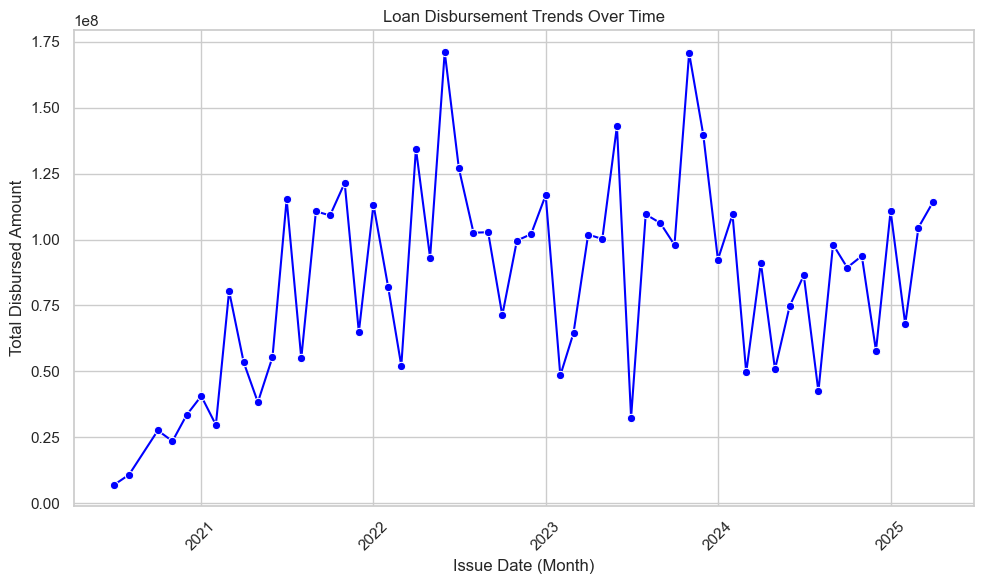

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'issue_date' is in datetime format
data['issue_date'] = pd.to_datetime(data['issue_date'], errors='coerce')

# Ensure 'total_disbursed' is numeric
data['total_amount'] = pd.to_numeric(data['total_amount'], errors='coerce')

# Grouping by month for loan disbursement trends
loan_disbursement_trends = data.groupby(data['issue_date'].dt.to_period('M'))['total_amount'].sum().reset_index()

# Convert 'issue_date' back to a datetime for plotting
loan_disbursement_trends['issue_date'] = loan_disbursement_trends['issue_date'].dt.to_timestamp()

# Check for any missing values after conversion
loan_disbursement_trends = loan_disbursement_trends.dropna()

# Plot loan disbursement trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='issue_date', y='total_amount', data=loan_disbursement_trends, marker='o', color='blue')
plt.title('Loan Disbursement Trends Over Time')
plt.xlabel('Issue Date (Month)')
plt.ylabel('Total Disbursed Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Loan disbursement over time
fig1 = px.box(data, x='issue_date', y='loan_amount', color='loan_amount_paid', title='Loan Disbursement Over Time')
fig1.show()

# Emotional intensity by time of day
fig2 = px.box(data, x='time_of_day', y='intensity', color='primary_emotion', title='Emotional Intensity by Time of Day')
fig2.show()

# Relationship closeness by loan amount
fig3 = px.scatter(data, x='relationship', y='loan_amount', color='primary_emotion',
                  size='credit_limit', title='Loan Amount by Relationship Closeness and Emotion')
fig3.show()

# Loan status breakdown based on total amount
fig4 = px.pie(data, names='status', values='total_amount', title='Loan Status Breakdown by Total Amount')
fig4.show()

# Additional plot for other columns in data_columns1
# Example: Correlation heatmap (if needed)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = data[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Data Columns')
plt.show()


Machine Learning model to predict loan terms based on emotional and contextual data & identifying important features

Mean Squared Error: 0.13
R-squared: 0.96


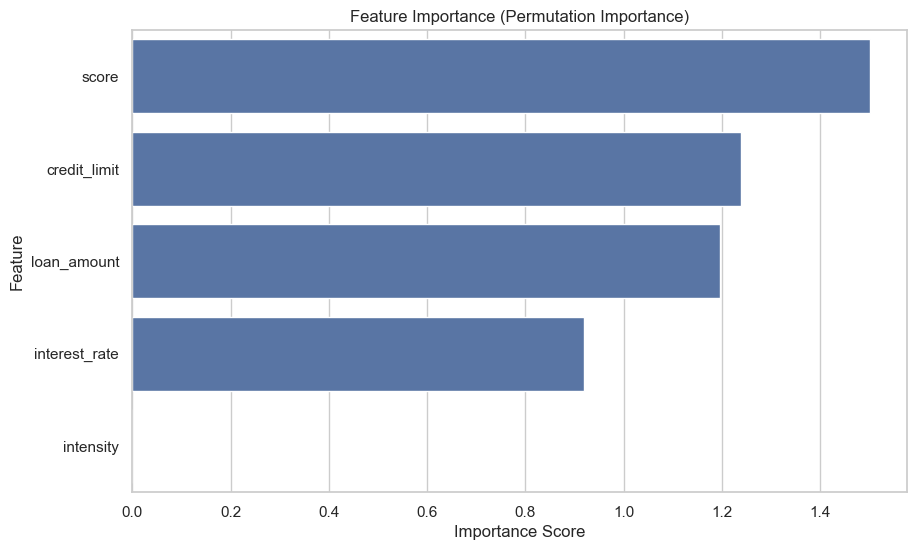

Predicted Loan Term: 4.54


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the merged data
# Prepare your features and target variable
X = data[['score', 'credit_limit', 'interest_rate', 'loan_amount', 'intensity']]  # Include relevant features
y = data['loan_term']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance using permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Prediction function
def predict_loan_term(input_data):
    """
    Predicts the loan term based on the input features.

    Parameters:
    input_data (dict): Dictionary containing input features.

    Returns:
    float: Predicted loan term.
    """
    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data])
    
    # Make the prediction
    predicted_term = model.predict(input_df)
    return predicted_term[0]

# Example usage of the prediction function
input_example = {
    'score': 700,
    'credit_limit': 15000,
    'interest_rate': 5.5,
    'loan_amount': 10000,
    'intensity': 0.8
}

predicted_term = predict_loan_term(input_example)
print(f'Predicted Loan Term: {predicted_term:.2f}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features and target variable
X = data[['score', 'credit_limit', 'interest_rate', 'loan_amount', 'intensity']]
y = data['loan_term']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
!pip install plotly
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Loan Disbursement Trends
loan_disbursement_fig = px.line(loan_disbursement_trends, 
                                  x='issue_date', 
                                  y='total_amount', 
                                  title='Loan Disbursement Trends Over Time', 
                                  markers=True)
loan_disbursement_fig.update_layout(yaxis_title='Total Disbursed Amount',
                                     xaxis_title='Issue Date (Month)')

# Emotional Intensity Analysis
emotional_intensity_fig = px.box(data, 
                                  x='time_of_day', 
                                  y='intensity', 
                                  color='primary_emotion', 
                                  title='Emotional Intensity by Time of Day')
emotional_intensity_fig.update_layout(yaxis_title='Emotional Intensity',
                                       xaxis_title='Time of Day')

# Loan-Emotion Correlation (Scatter Plot)
loan_emotion_corr_fig = px.scatter(data, 
                                    x='relationship', 
                                    y='loan_amount', 
                                    color='primary_emotion', 
                                    size='credit_limit', 
                                    title='Loan Amount by Relationship Closeness and Emotion',
                                    hover_name='user_id')
loan_emotion_corr_fig.update_layout(yaxis_title='Loan Amount',
                                     xaxis_title='Relationship Closeness')

# Default Rate and Performance Trends (Bar Chart)
performance_fig = go.Figure()
performance_fig.add_trace(go.Bar(x=annual_performance['issue_year'],
                                   y=annual_performance['defaulted_loans'],
                                   name='Defaulted Loans',
                                   marker_color='salmon'))
performance_fig.add_trace(go.Bar(x=annual_performance['issue_year'],
                                   y=annual_performance['total_disbursed'],
                                   name='Total Disbursed',
                                   marker_color='blue'))
performance_fig.update_layout(title='Defaulted Loans and Total Disbursed Over Time',
                              barmode='group',
                              xaxis_title='Year',
                              yaxis_title='Amount',
                              legend_title='Metrics')

# Feature Importance (Bar Chart)
feature_importance_fig = px.bar(feature_importance, 
                                 x='Importance', 
                                 y='Feature', 
                                 title='Feature Importance (Permutation Importance)', 
                                 orientation='h')
feature_importance_fig.update_layout(xaxis_title='Importance Score',
                                      yaxis_title='Feature')

# Loan Status Breakdown (Pie Chart)
loan_status_fig = px.pie(data, 
                          names='status', 
                          values='total_amount', 
                          title='Loan Status Breakdown by Total Amount')
loan_status_fig.update_traces(textinfo='percent+label')

# Display the figures in a single dashboard layout
from plotly.subplots import make_subplots

# Create a subplot grid
fig = make_subplots(rows=3, cols=2, 
                    specs=[[{"type": "scatter"}, {"type": "box"}],
                           [{"type": "bar"}, {"type": "bar"}],
                           [{"type": "pie"}, {"type": "bar"}]],
                    subplot_titles=("Loan Disbursement Trends", "Emotional Intensity by Time of Day",
                                    "Defaulted Loans and Total Disbursed", "Feature Importance",
                                    "Loan Status Breakdown", "Loan-Emotion Correlation"))

# Add each figure to the subplots
fig.add_trace(loan_disbursement_fig.data[0], row=1, col=1)
fig.add_trace(emotional_intensity_fig.data[0], row=1, col=2)
fig.add_trace(performance_fig.data[0], row=2, col=1)
fig.add_trace(performance_fig.data[1], row=2, col=1)
fig.add_trace(feature_importance_fig.data[0], row=2, col=2)
fig.add_trace(loan_status_fig.data[0], row=3, col=1)

# Update layout
fig.update_layout(title_text='Overall Visualization Dashboard',
                  height=1000)

# Show the complete dashboard
fig.show()


In [ ]:
import streamlit as st
import plotly.express as px

# Title of the app
st.title('Loan and Emotional Data Dashboard')

# Create your figures
fig1 = px.box(data, x='issue_date', y='loan_amount', color='loan_amount_paid', title='Loan Disbursement Over Time')
fig2 = px.box(data, x='time_of_day', y='intensity', color='primary_emotion', title='Emotional Intensity by Time of Day')

# Display the figures
st.plotly_chart(fig1)
st.plotly_chart(fig2)

# Add more visualizations and insights as needed
